<a href="https://colab.research.google.com/github/Rajarshi012003/AI_Ethics_Term_Project/blob/main/AI_Ethics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd

# Dictionary mapping department codes to department names
departments = {
    'AE': 'Aerospace Engineering',
    'AG': 'Agricultural and Food Engineering',
    'AR': 'Architecture and Regional Planning',
    'BT': 'Biotechnology',
    'CH': 'Chemical Engineering',
    'CY': 'Chemistry',
    'CE': 'Civil Engineering',
    'CS': 'Computer Science and Engineering',
    'CR': 'Cryogenic Engineering Centre',
    'EE': 'Electrical Engineering',
    'EC': 'Electronics and Electrical Communication Engineering',
    'GS': 'G.S. Sanyal School of Telecommunications',
    'GG': 'Geology and Geophysics',
    'HS': 'Humanities and Social Sciences',
    'IM': 'Industrial and Systems Engineering',
    'IE': 'Instrumentation Engineering',
    'MA': 'Mathematics',
    'ME': 'Mechanical Engineering',
    'MT': 'Metallurgical and Materials Engineering',
    'MI': 'Mining Engineering',
    'NA': 'Ocean Engineering and Naval Architecture',
    'PH': 'Physics',
    'IP': 'Rajiv Gandhi School of Intellectual Property Law',
    'CL': 'Centre for Oceans, Rivers, Atmosphere and Land Science',
    'AT': 'Advanced Technology Development Centre',
    'RE': 'Reliability Engineering Centre',
    'QM': 'Quality Management (Subir Chowdhury School of Quality and Reliability)',
    'ES': 'Environmental Science and Engineering',
    'MF': 'Manufacturing Engineering (Industrial & Systems Engineering)',
    'MS': 'Materials Science Centre',
    'QE': 'Quality Engineering (Subir Chowdhury School of Quality and Reliability)',
    'EX': 'Exploration Engineering (Geology and Geophysics)'
}

file_path = 'place_data.xlsx'  # Replace with your file path

# Create a dictionary to store processed dataframes
processed_dfs = {}

# Process each sheet
for i in range(1, 13):
    sheet_name = f'S{i}'
    try:
        # Read the sheet
        df = pd.read_excel(file_path, sheet_name=sheet_name)

        # Extract department code from Roll No and map it to department name
        df['Department'] = df['Roll No'].str[2:4].map(departments)

        # Store the processed dataframe
        processed_dfs[sheet_name] = df

        print(f"Sheet {sheet_name} processed successfully!")
    except Exception as e:
        print(f"Error processing sheet {sheet_name}: {e}")

# Save all processed sheets to a new Excel file
output_file_path = 'updated_place_data.xlsx'

with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, df in processed_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"All sheets processed and saved to {output_file_path}")


Sheet S1 processed successfully!
Sheet S2 processed successfully!
Sheet S3 processed successfully!
Sheet S4 processed successfully!
Sheet S5 processed successfully!
Sheet S6 processed successfully!
Sheet S7 processed successfully!
Sheet S8 processed successfully!
Sheet S9 processed successfully!
Sheet S10 processed successfully!
Sheet S11 processed successfully!
Sheet S12 processed successfully!
All sheets processed and saved to updated_place_data.xlsx


In [ ]:
processed_dfs['S1'].loc[820,'Roll No'] = '20ME30081'
processed_dfs['S1'].loc[820,'Department'] = 'Mechanical Engineering'

In [ ]:
# Save all processed sheets to a new Excel file
output_file_path = 'updated_place_data.xlsx'

with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, df in processed_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"All sheets processed and saved to {output_file_path}")

All sheets processed and saved to updated_place_data.xlsx


In [ ]:
output_file_path = 'updated_place_data.xlsx'  # Replace with your desired output file path
df.to_excel(output_file_path, index=False)


In [ ]:
import pandas as pd
import numpy as np

# Predefined CTC ranges for companies (in LPA)
company_ctc_ranges = {
    'AB InBev India': (19, 36),
    'Auronova Consulting': (12, 18),
    'Axis Bank- BIU': (14, 22),
    'Bank of America': (16, 30),
    'Bluestone_Management Trainee': (18, 28),
    'BNY Mellon': (12, 20),
    'Cars 24': (15, 25),
    'CITI': (18, 32),
    'Dream 11': (25, 45),
    'EXXONMOBIL': (20, 35),
    'GE AEROSPACE': (18, 30),
    'Google_Software Engineer University Graduate': (30, 70),
    'Microsoft_Software Engineer': (25, 45),
    'Goldman Sachs_Software Engineering': (28, 50),
    'Amazon': (28, 44),
    'JPMorgan_QUANTITATIVE RESEARCHER': (24, 40),
    'Zomato SDE': (18, 30),
    'TCG Digital': (10, 15),
    'Accenture AI': (8, 15),
    'Tiger Analytics': (12, 20)
}

# Department priority tiers (higher tiers get higher CTC within company range)
department_priority = {
    'Computer Science and Engineering': 1,
    'Electronics and Electrical Communication Engineering': 1,
    'Electrical Engineering': 1,
    'Mathematics': 2,
    'Mechanical Engineering': 2,
    'Civil Engineering': 2,
    'Chemical Engineering': 2,
    'Metallurgical and Materials Engineering': 3,
    'Industrial and Systems Engineering': 3,
    'Physics': 3,
    'Chemistry': 3,
    'Humanities and Social Sciences': 4,
    'Architecture and Regional Planning': 4,
    'Agricultural and Food Engineering': 4
}

def calculate_ctc(row):
    company = row['Company']
    dept = row['Department']

    # Get base CTC range
    ctc_min, ctc_max = company_ctc_ranges.get(company, (10, 20))  # Default range for unknown companies

    # Get priority tier
    tier = department_priority.get(dept, 4)  # Default to lowest tier

    # Calculate CTC based on tier with safety checks
    if tier == 1:
        low = int(ctc_max*0.85)
        high = ctc_max
    elif tier == 2:
        low = int(ctc_max*0.7)
        high = int(ctc_max*0.9)
    elif tier == 3:
        low = int(ctc_max*0.6)
        high = int(ctc_max*0.8)
    else:
        low = ctc_min
        high = int(ctc_max*0.7)

    # Ensure high is always greater than low
    if low >= high:
        # Add a small buffer to high if they're equal
        high = low + 1

    return np.random.randint(low, high)

# Load the Excel file with multiple sheets
input_file_path = 'updated_place_data.xlsx'
output_file_path = 'placement_data_with_ctc.xlsx'

# Create a dictionary to store processed dataframes
processed_dfs = {}

# Process each sheet
for i in range(1, 13):
    sheet_name = f'S{i}'
    try:
        # Read the sheet
        df = pd.read_excel(input_file_path, sheet_name=sheet_name)

        # Apply the function to create CTC column
        df['CTC (LPA)'] = df.apply(calculate_ctc, axis=1)

        # Store the processed dataframe
        processed_dfs[sheet_name] = df

        print(f"Sheet {sheet_name} processed successfully!")
    except Exception as e:
        print(f"Error processing sheet {sheet_name}: {e}")

# Save all processed sheets to a new Excel file
with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, df in processed_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"CTC column generated successfully for all sheets and saved to {output_file_path}")


Sheet S1 processed successfully!
Sheet S2 processed successfully!
Sheet S3 processed successfully!
Sheet S4 processed successfully!
Sheet S5 processed successfully!
Sheet S6 processed successfully!
Sheet S7 processed successfully!
Sheet S8 processed successfully!
Sheet S9 processed successfully!
Sheet S10 processed successfully!
Sheet S11 processed successfully!
Sheet S12 processed successfully!
CTC column generated successfully for all sheets and saved to placement_data_with_ctc.xlsx


In [ ]:
processed_dfs['S3']

Company                Name    Roll No  \
0   Americana Restaurants   VANSHUL SHIKKEWAL  21ME10092   
1   Americana Restaurants  MRITUNJAY AGRAHARI  20ME31028   
2                    Amex         ANMOL KUMAR  20HS20010   
3                  Axxela       SARTHAK MUTHA  21HS10046   
4                  Axxela        SHRIT GAUTAM  20CH3FP26   
..                    ...                 ...        ...   
70            TCG Digital    AMALA LINGAMALLA  20GG20014   
71            TCG Digital     ANKIT CHOWDHURY  20ME31009   
72            TCG Digital    AYUSH SRIVASTAVA  21CH10093   
73            TCG Digital      PRATIK PRANJAL  21MI10040   
74            TCG Digital  ASHUTOSH PANIGRAHY  20BT3FP25   

                        Department  CTC (LPA)  
0           Mechanical Engineering         17  
1           Mechanical Engineering         17  
2   Humanities and Social Sciences         12  
3   Humanities and Social Sciences         13  
4             Chemical Engineering         17  
..                             ...        ...  
70          Geology and Geophysics         10  
71          Mechanical Engineering         10  
72            Chemical Engineering         11  
73              Mining Engineering         10  
74                   Biotechnology         10  

[75 rows x 5 columns]

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

def calculate_cf_rating(row):
    # Base rating factors
    base_rating = 1500
    contest_performance = np.random.normal(0, 200)  # Simulating contest performance
    department_bonus = 0
    experience_factor = 0

    # Department bonuses (adjust as needed based on CodeForces trends)
    dept_bonuses = {
        'Computer Science and Engineering': 100,
        'Electronics and Electrical Communication Engineering': 75,
        'Mathematics': 50,
        'Electrical Engineering': 50,
        'Mechanical Engineering': 25,
        'Physics': 25
    }
    department_bonus = dept_bonuses.get(row['Department'], 0)

    # Experience factor based on roll number (assuming first two digits are year)
    current_year = datetime.now().year  # This will be 2025 based on the current date
    try:
        if isinstance(row['Roll No'], str):
            student_year = int('20' + row['Roll No'][:2])
            experience_factor = (current_year - student_year) * 50  # 50 points per year of experience
        else:
            experience_factor = 0
    except Exception:
        experience_factor = 0

    # Company factor (assuming top tech companies might correlate with higher CF ratings)
    company_factor = 0
    top_tech_companies = ['Google', 'Microsoft', 'Amazon', 'Facebook', 'Apple']
    if isinstance(row['Company'], str) and any(company in row['Company'] for company in top_tech_companies):
        company_factor = 100

    # Calculate final rating
    cf_rating = base_rating + contest_performance + department_bonus + experience_factor + company_factor

    # Ensure rating is within reasonable bounds (300 to 3500, typical CF range)
    return max(300, min(3500, int(cf_rating)))

# Load the Excel file with multiple sheets
input_file_path = 'placement_data_with_ctc.xlsx'
output_file_path = 'placement_data_with_cf_rating.xlsx'

# Create a dictionary to store processed dataframes
processed_dfs = {}

# Process each sheet
for i in range(1, 13):
    sheet_name = f'S{i}'
    try:
        # Read the sheet
        df = pd.read_excel(input_file_path, sheet_name=sheet_name)

        # Add CF Rating column
        df['CF Rating'] = df.apply(calculate_cf_rating, axis=1)

        # Store the processed dataframe
        processed_dfs[sheet_name] = df

        print(f"Sheet {sheet_name} processed successfully!")
    except Exception as e:
        print(f"Error processing sheet {sheet_name}: {e}")

# Save all processed sheets to a new Excel file
with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
    for sheet_name, df in processed_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"CF Rating column generated successfully for all sheets and saved to {output_file_path}")


Sheet S1 processed successfully!
Sheet S2 processed successfully!
Sheet S3 processed successfully!
Sheet S4 processed successfully!
Sheet S5 processed successfully!
Sheet S6 processed successfully!
Sheet S7 processed successfully!
Sheet S8 processed successfully!
Sheet S9 processed successfully!
Sheet S10 processed successfully!
Sheet S11 processed successfully!
Sheet S12 processed successfully!
CF Rating column generated successfully for all sheets and saved to placement_data_with_cf_rating.xlsx


In [ ]:
import pandas as pd
import numpy as np

def calculate_cgpa(row):
    # Base CGPA factors
    base_cgpa = 7.0  # Starting point for CGPA
    department_bonus = 0
    company_factor = 0

    # Department priority tiers (similar to the CTC calculation)
    department_priority = {
        'Computer Science and Engineering': 1,
        'Electronics and Electrical Communication Engineering': 1,
        'Electrical Engineering': 1,
        'Mathematics': 2,
        'Mechanical Engineering': 2,
        'Civil Engineering': 2,
        'Chemical Engineering': 2,
        'Metallurgical and Materials Engineering': 3,
        'Industrial and Systems Engineering': 3,
        'Physics': 3,
        'Chemistry': 3,
        'Humanities and Social Sciences': 4,
        'Architecture and Regional Planning': 4,
        'Agricultural and Food Engineering': 4
    }

    # Convert priority to bonus
    tier = department_priority.get(row['Department'], 4)
    if tier == 1:
        department_bonus = 1.0
    elif tier == 2:
        department_bonus = 0.7
    elif tier == 3:
        department_bonus = 0.4
    else:
        department_bonus = 0.2

    # Experience factor based on roll number (assuming first two digits are year)
    current_year = 2025  # Current year from the date provided
    try:
        student_year = int('20' + str(row['Roll No'])[:2])
        experience_factor = min(1.0, (current_year - student_year) * 0.2)  # Cap at 1.0
    except:
        experience_factor = 0

    # Company factor (premium companies get higher bonus)
    premium_companies = ['Google', 'Microsoft', 'Amazon', 'Goldman Sachs', 'JPMorgan', 'Dream 11']
    good_companies = ['CITI', 'Bank of America', 'EXXONMOBIL', 'GE AEROSPACE', 'Zomato']

    if any(company in str(row['Company']) for company in premium_companies):
        company_factor = 0.8
    elif any(company in str(row['Company']) for company in good_companies):
        company_factor = 0.5
    else:
        company_factor = 0.2

    # Add some randomness to make the data look more natural
    random_factor = np.random.normal(0, 0.3)

    # Calculate final CGPA
    cgpa = base_cgpa + department_bonus + experience_factor + company_factor + random_factor

    # Ensure CGPA is within reasonable bounds (5.0 to 10.0 for placed students)
    return max(5.0, min(10.0, round(cgpa, 2)))

# Load the Excel file with multiple sheets
input_file_path = 'placement_data_with_cf_rating.xlsx'
output_file_path = 'placement_data_with_cgpa.xlsx'

# Create a dictionary to store processed dataframes
processed_dfs = {}

# Process each sheet
for i in range(1, 13):
    sheet_name = f'S{i}'
    try:
        # Read the sheet
        df = pd.read_excel(input_file_path, sheet_name=sheet_name)

        # Add CGPA column
        df['CGPA'] = df.apply(calculate_cgpa, axis=1)

        # Store the processed dataframe
        processed_dfs[sheet_name] = df

        print(f"Sheet {sheet_name} processed successfully!")
    except Exception as e:
        print(f"Error processing sheet {sheet_name}: {e}")

# Fix for the "At least one sheet must be visible" error
if processed_dfs:
    with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
        for sheet_name, df in processed_dfs.items():
            df.to_excel(writer, sheet_name=sheet_name, index=False)
            # Ensure sheet is visible
            writer.sheets[sheet_name].sheet_state = 'visible'

    print(f"CGPA column generated successfully for all sheets and saved to {output_file_path}")
else:
    print("No sheets were processed successfully. Check your input file.")


Sheet S1 processed successfully!
Sheet S2 processed successfully!
Sheet S3 processed successfully!
Sheet S4 processed successfully!
Sheet S5 processed successfully!
Sheet S6 processed successfully!
Sheet S7 processed successfully!
Sheet S8 processed successfully!
Sheet S9 processed successfully!
Sheet S10 processed successfully!
Sheet S11 processed successfully!
Sheet S12 processed successfully!
CGPA column generated successfully for all sheets and saved to placement_data_with_cgpa.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_context("talk")

# Function to load all sheets and combine them
def load_all_sheets(file_path):
    # Read all sheets
    all_sheets = pd.read_excel(file_path, sheet_name=None)

    # Combine all sheets into one dataframe
    combined_df = pd.DataFrame()
    for sheet_name, df in all_sheets.items():
        # Ensure consistent column order across sheets
        if 'Roll No' not in df.columns and 'Company' in df.columns:
            # Some sheets have columns in different order
            df = df[['Company', 'Name', 'Roll No', 'Department', 'CTC (LPA)', 'CF Rating', 'CGPA']]
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

# Load the data
file_path = 'placement_data_with_cgpa.xlsx'
df = load_all_sheets(file_path)

# Basic data cleaning
df['CTC (LPA)'] = pd.to_numeric(df['CTC (LPA)'], errors='coerce')
df['CF Rating'] = pd.to_numeric(df['CF Rating'], errors='coerce')
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')

# Extract batch year from Roll No (first two digits)
df['Batch'] = df['Roll No'].astype(str).str[:2].apply(lambda x: '20' + x if x.isdigit() else None)

# Print basic information
print(f"Total number of placement records: {len(df)}")
print(f"Number of unique companies: {df['Company'].nunique()}")
print(f"Number of unique departments: {df['Department'].nunique()}")


Total number of placement records: 1815
Number of unique companies: 306
Number of unique departments: 32



Basic Statistics:
         CTC (LPA)    CF Rating         CGPA
count  1815.000000  1815.000000  1815.000000
mean     15.790083  1725.196143     8.639598
std       5.768266   210.517146     0.486495
min       8.000000  1027.000000     7.060000
25%      13.000000  1586.000000     8.310000
50%      15.000000  1722.000000     8.620000
75%      17.000000  1868.000000     8.970000
max      68.000000  2422.000000    10.000000


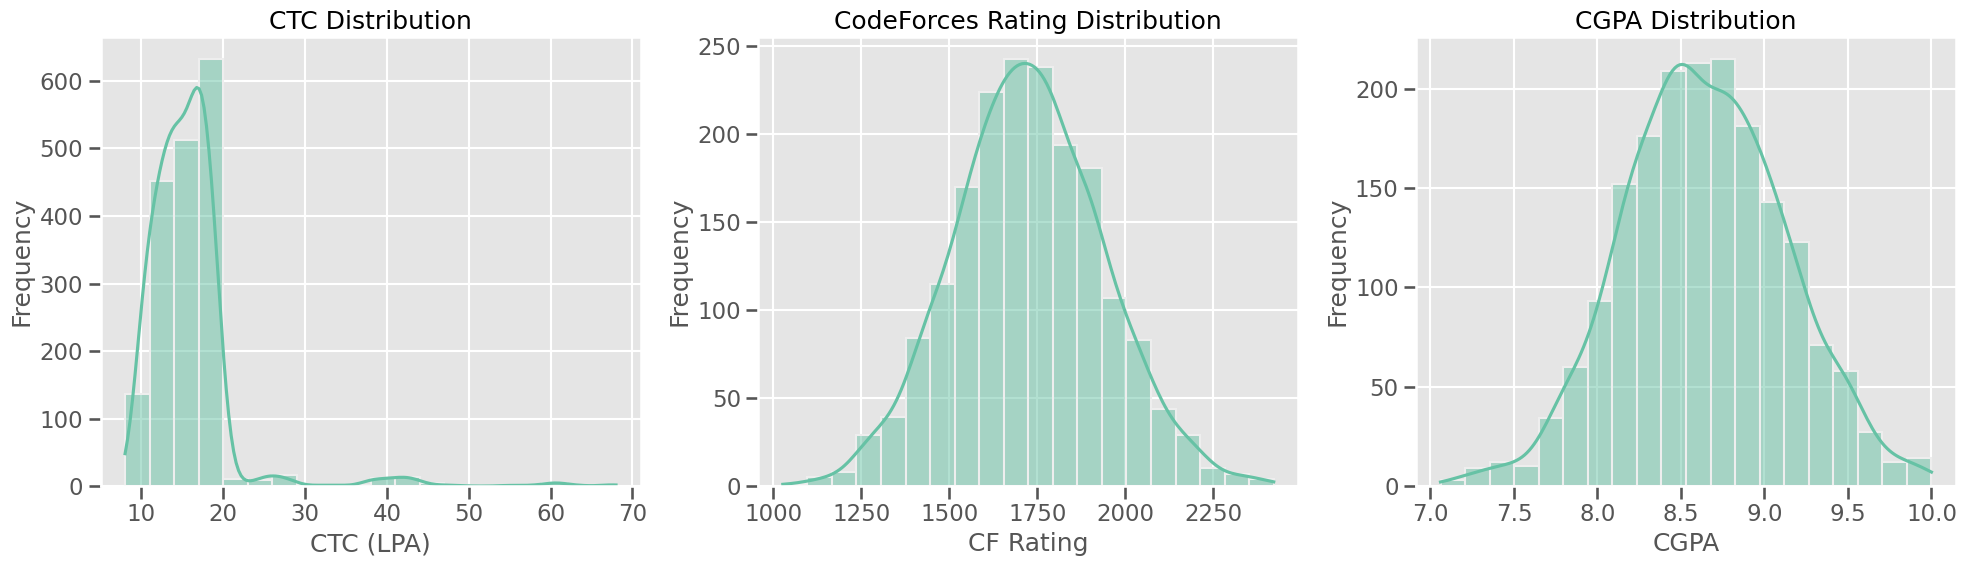

In [ ]:
# Basic statistics for numerical columns
stats = df[['CTC (LPA)', 'CF Rating', 'CGPA']].describe()
print("\nBasic Statistics:")
print(stats)

# Create a figure for distribution plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# CTC Distribution
sns.histplot(df['CTC (LPA)'], kde=True, ax=axes[0], bins=20)
axes[0].set_title('CTC Distribution')
axes[0].set_xlabel('CTC (LPA)')
axes[0].set_ylabel('Frequency')

# CF Rating Distribution
sns.histplot(df['CF Rating'], kde=True, ax=axes[1], bins=20)
axes[1].set_title('CodeForces Rating Distribution')
axes[1].set_xlabel('CF Rating')
axes[1].set_ylabel('Frequency')

# CGPA Distribution
sns.histplot(df['CGPA'], kde=True, ax=axes[2], bins=20)
axes[2].set_title('CGPA Distribution')
axes[2].set_xlabel('CGPA')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Department-wise Analysis (Top 10 by Avg CTC):
                                                    CTC (LPA)                 \
                                                         mean median min max   
Department                                                                     
Computer Science and Engineering                    21.520000   18.0  17  68   
Electrical Engineering                              18.895833   18.0  17  61   
Electronics and Electrical Communication Engine...  18.579487   18.0  17  43   
Mechanical Engineering                              16.191710   16.0  10  61   
Chemical Engineering                                16.173554   15.0  11  58   
Mathematics                                         16.074380   15.0  14  38   
Civil Engineering                                   15.916667   16.0  14  26   
Industrial and Systems Engineering                  14.689189   14.0  12  48   
Chemistry                                           14.111111   14.5  12 

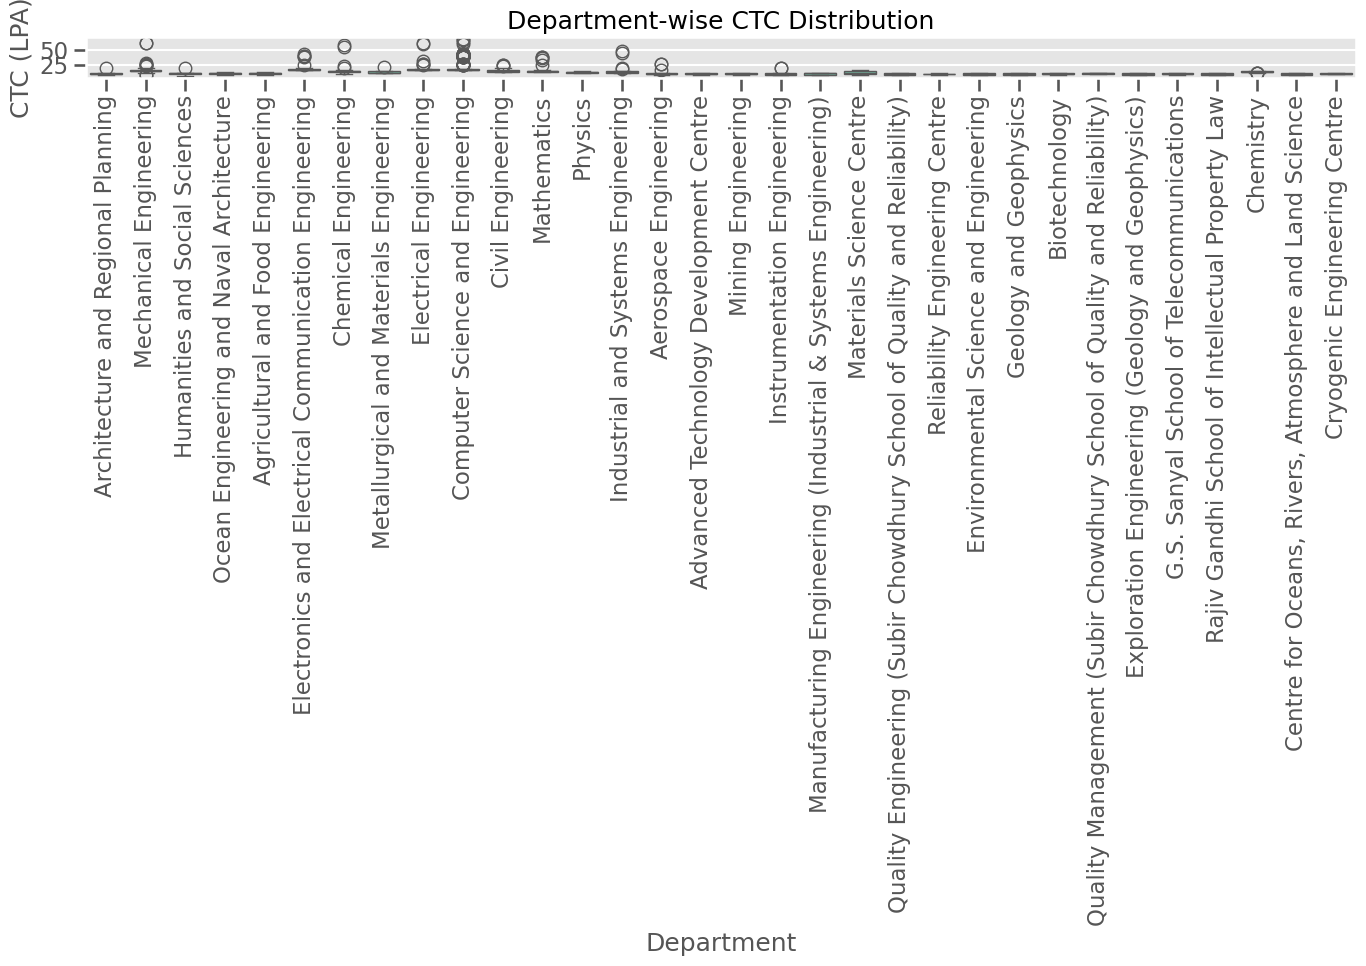

<ipython-input-54-7b4b51ad592b>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department', y='CTC (LPA)', data=dept_subset, estimator=np.mean, ci=None)


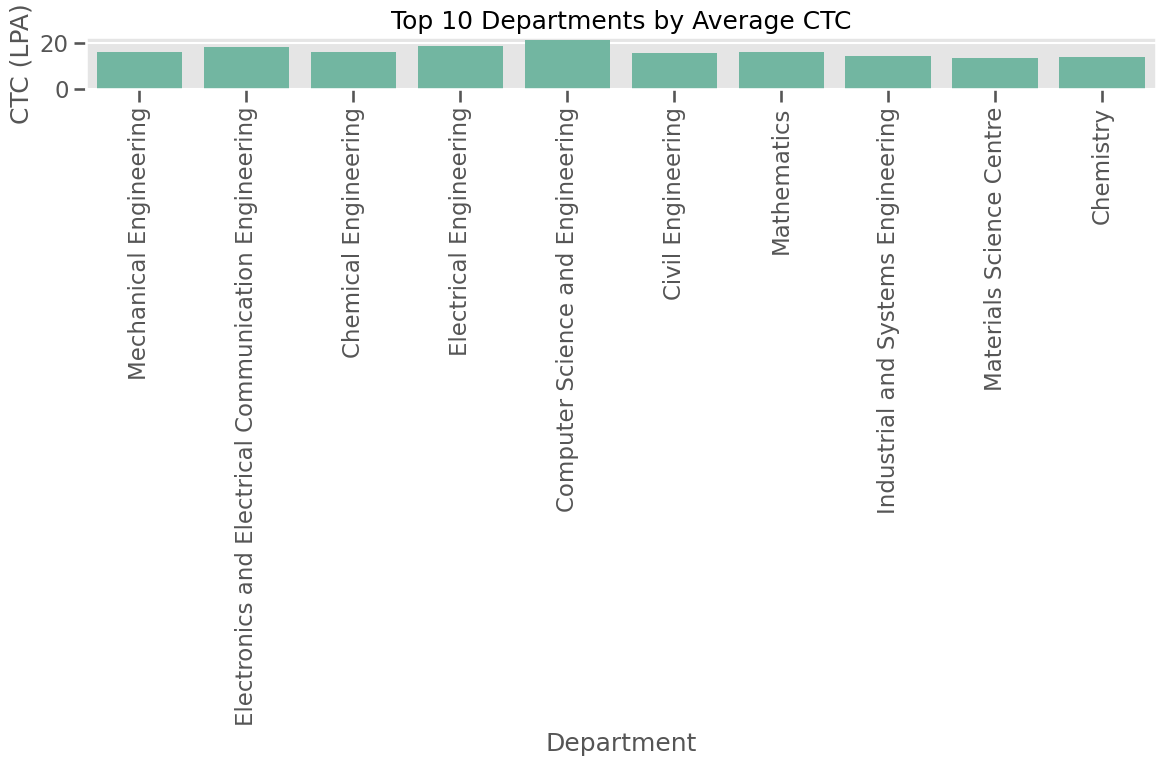

In [ ]:
# Department-wise average CTC, CF Rating, and CGPA
dept_analysis = df.groupby('Department').agg({
    'CTC (LPA)': ['mean', 'median', 'min', 'max', 'count'],
    'CF Rating': ['mean', 'std'],
    'CGPA': ['mean', 'std']
}).sort_values(('CTC (LPA)', 'mean'), ascending=False)

print("\nDepartment-wise Analysis (Top 10 by Avg CTC):")
print(dept_analysis.head(10))

# Plot department-wise CTC
plt.figure(figsize=(14, 10))
sns.boxplot(x='Department', y='CTC (LPA)', data=df)
plt.xticks(rotation=90)
plt.title('Department-wise CTC Distribution')
plt.tight_layout()
plt.show()

# Top 10 departments by average CTC
top_depts = dept_analysis.head(10).index
dept_subset = df[df['Department'].isin(top_depts)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='CTC (LPA)', data=dept_subset, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('Top 10 Departments by Average CTC')
plt.tight_layout()
plt.show()



Top 15 Companies by Number of Offers:
Company
AMEX                            38
NSE                             36
AXTRIA                          32
Qualcomm                        30
Microsoft_Software Engineer     30
ACCENTURE S&C                   28
L&T                             26
Meesho_SDE-I                    24
TURING                          24
Deloitte USI                    22
TI ANALOG ENGINEER              20
Bank of America                 19
Mastercard_Software Engineer    18
ACCENTURE AI                    18
Axtria                          18
Name: count, dtype: int64

Top 15 Companies by Average CTC (with at least 3 offers):
                                              CTC (LPA)        \
                                                   mean count   
Company                                                         
Google_Software Engineer University Graduate  59.000000    12   
Dream 11                                      41.666667     3   
Microsoft_Software

<ipython-input-55-e46e6bb682e1>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='CTC (LPA)', data=company_subset, estimator=np.mean, ci=None)


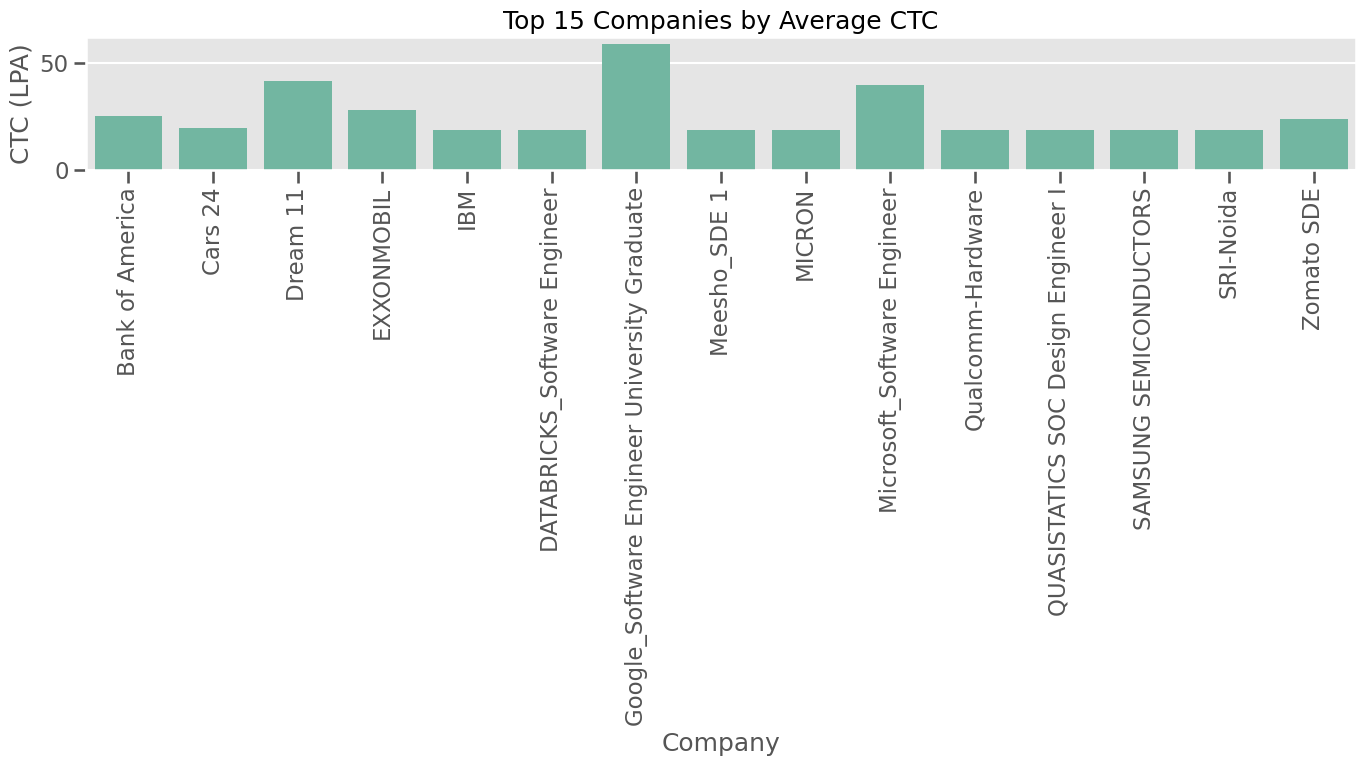

In [ ]:
# Top 15 companies by number of offers
company_counts = df['Company'].value_counts().head(15)
print("\nTop 15 Companies by Number of Offers:")
print(company_counts)

# Top 15 companies by average CTC
company_ctc = df.groupby('Company').agg({
    'CTC (LPA)': ['mean', 'count'],
    'Department': lambda x: list(set(x))
}).sort_values(('CTC (LPA)', 'mean'), ascending=False)

company_ctc = company_ctc[company_ctc[('CTC (LPA)', 'count')] >= 3]  # At least 3 offers
print("\nTop 15 Companies by Average CTC (with at least 3 offers):")
print(company_ctc.head(15))

# Plot top 15 companies by average CTC
top_companies = company_ctc.head(15).index
company_subset = df[df['Company'].isin(top_companies)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Company', y='CTC (LPA)', data=company_subset, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('Top 15 Companies by Average CTC')
plt.tight_layout()
plt.show()



Correlation Matrix:
           CTC (LPA)  CF Rating      CGPA
CTC (LPA)   1.000000   0.123471  0.494225
CF Rating   0.123471   1.000000  0.190000
CGPA        0.494225   0.190000  1.000000


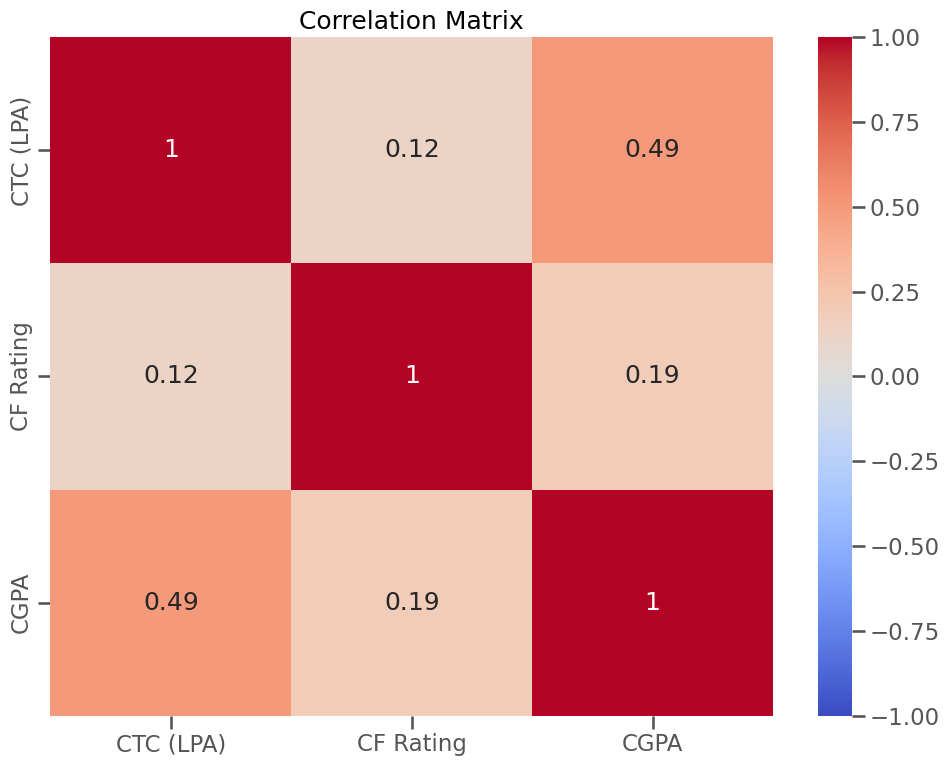

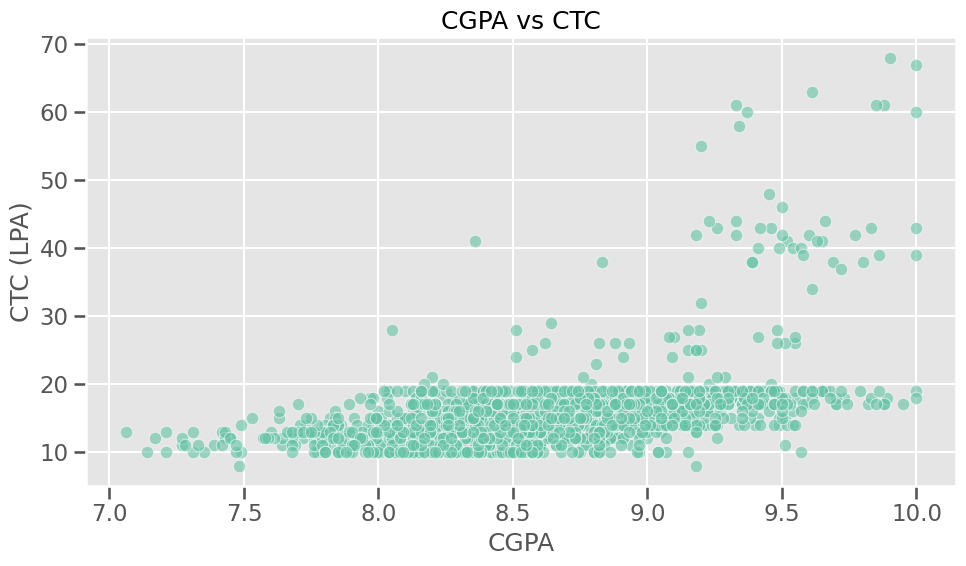

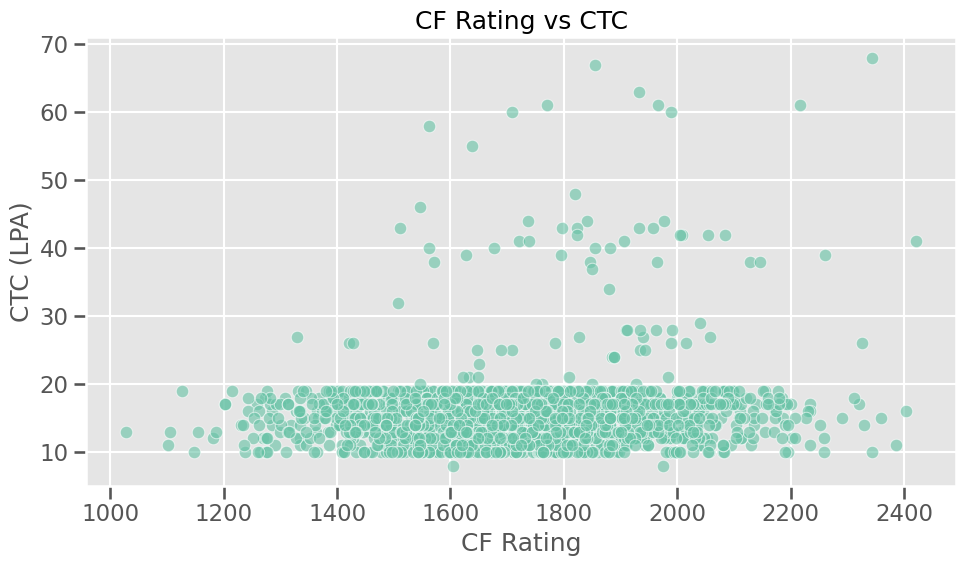

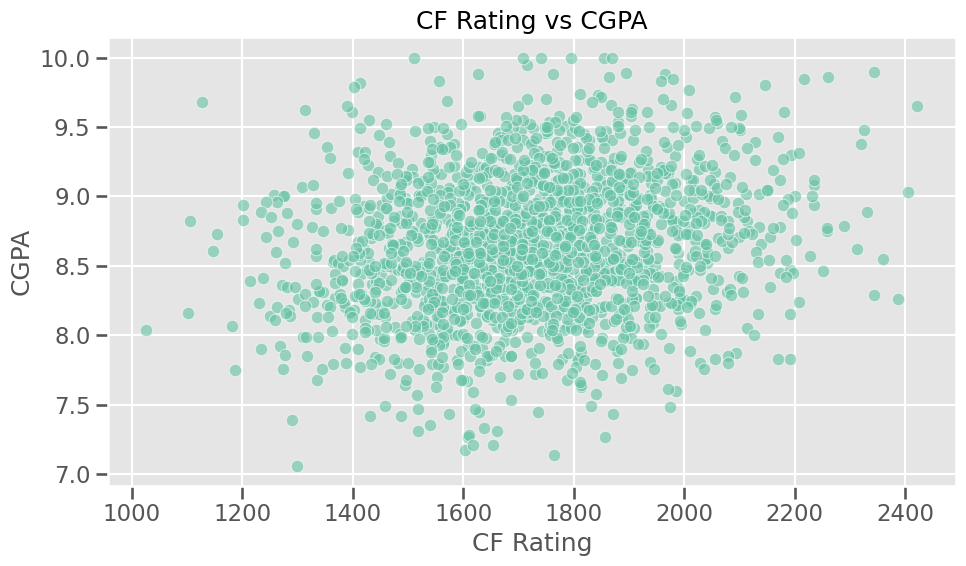

In [ ]:
# Calculate correlations
correlation = df[['CTC (LPA)', 'CF Rating', 'CGPA']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plot: CGPA vs CTC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CGPA', y='CTC (LPA)', data=df, alpha=0.6)
plt.title('CGPA vs CTC')
plt.tight_layout()
plt.show()

# Scatter plot: CF Rating vs CTC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CF Rating', y='CTC (LPA)', data=df, alpha=0.6)
plt.title('CF Rating vs CTC')
plt.tight_layout()
plt.show()

# Scatter plot: CF Rating vs CGPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CF Rating', y='CGPA', data=df, alpha=0.6)
plt.title('CF Rating vs CGPA')
plt.tight_layout()
plt.show()



Batch-wise Analysis:
       CTC (LPA)                 CF Rating      CGPA
            mean median count         mean      mean
Batch                                               
2018   14.000000   13.0     3  1888.000000  8.753333
2020   15.080519   14.0   770  1774.123377  8.770299
2021   16.473430   15.0   621  1725.359098  8.674799
2022   11.722222   11.0    18  1627.333333  8.055000
2023   16.309227   17.0   401  1634.633416  8.366459


<ipython-input-57-39a3e029d5a3>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Batch', y='CTC (LPA)', data=df, estimator=np.mean, ci=None, marker='o')


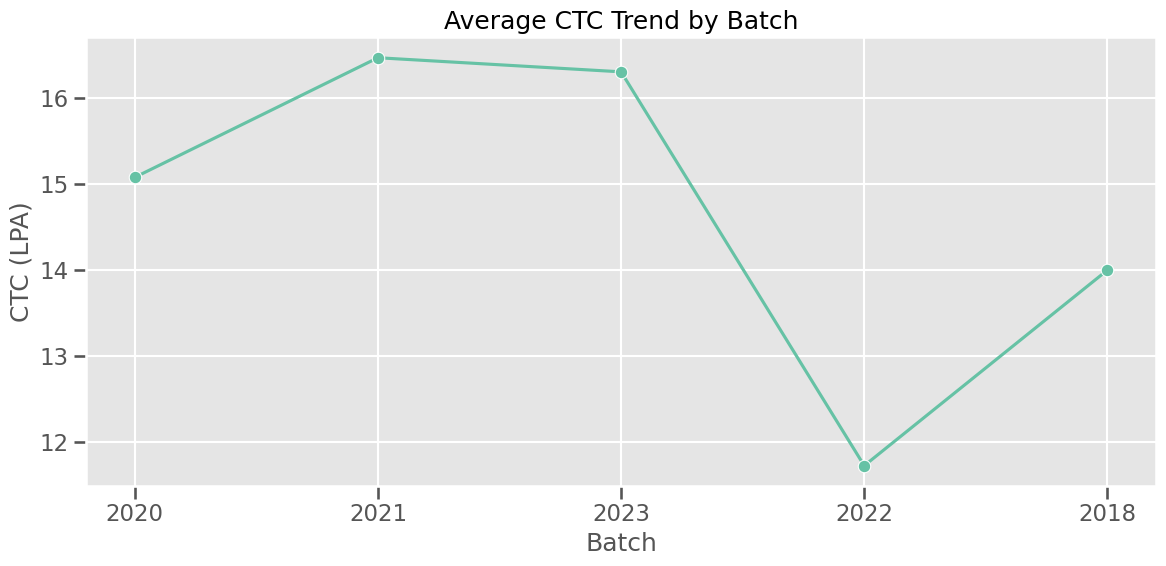

In [ ]:
# Batch-wise analysis
batch_analysis = df.groupby('Batch').agg({
    'CTC (LPA)': ['mean', 'median', 'count'],
    'CF Rating': ['mean'],
    'CGPA': ['mean']
}).sort_values('Batch')

print("\nBatch-wise Analysis:")
print(batch_analysis)

# Plot batch-wise CTC trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Batch', y='CTC (LPA)', data=df, estimator=np.mean, ci=None, marker='o')
plt.title('Average CTC Trend by Batch')
plt.grid(True)
plt.tight_layout()
plt.show()



Top-Tier vs Other Companies Comparison:
          CTC (LPA)                 CF Rating      CGPA
               mean median count         mean      mean
Top_Tier                                               
False     15.094510   15.0  1767  1720.774194  8.619372
True      41.395833   41.0    48  1887.979167  9.384167


<ipython-input-58-908a46c5fbf4>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


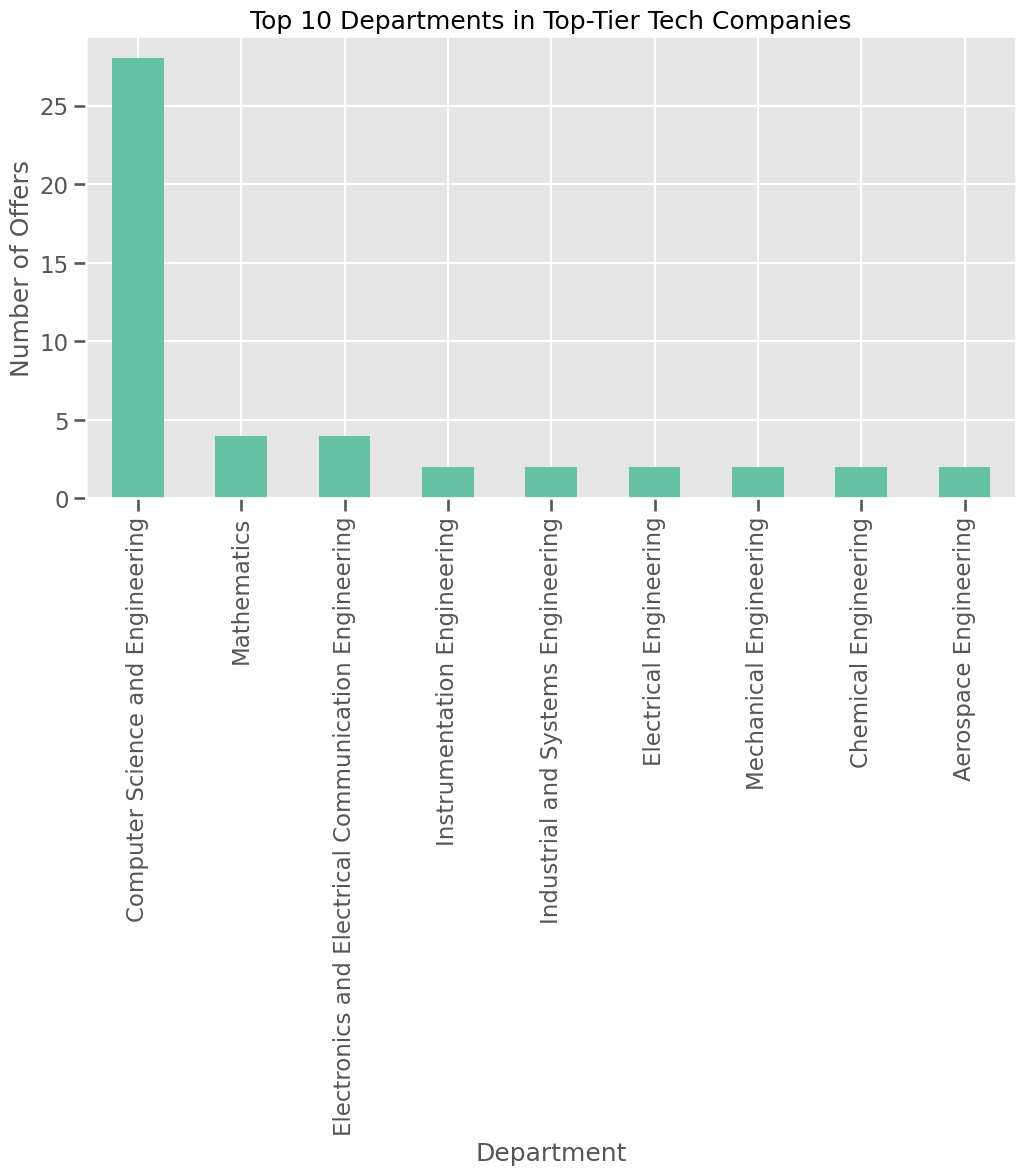

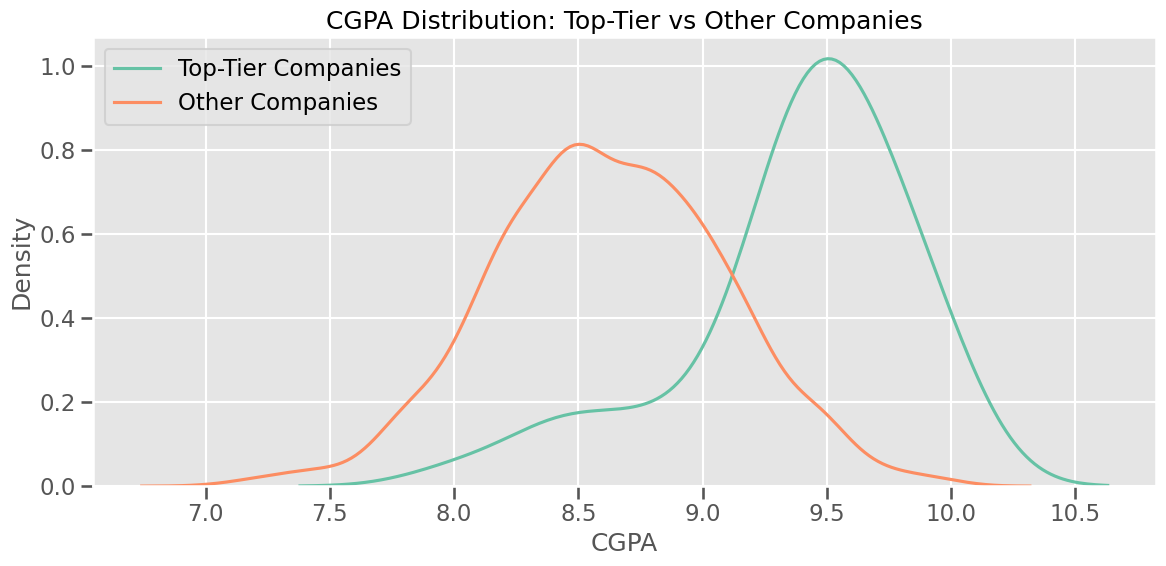

In [ ]:
# Define top-tier tech companies
top_tier_companies = ['Google', 'Microsoft', 'Amazon', 'Apple', 'Facebook', 'Goldman Sachs']

# Create a flag for top-tier companies
df['Top_Tier'] = df['Company'].apply(lambda x: any(company in str(x) for company in top_tier_companies))

# Compare top-tier vs other companies
tier_comparison = df.groupby('Top_Tier').agg({
    'CTC (LPA)': ['mean', 'median', 'count'],
    'CF Rating': ['mean'],
    'CGPA': ['mean']
})

print("\nTop-Tier vs Other Companies Comparison:")
print(tier_comparison)

# Department distribution in top-tier companies
top_tier_df = df[df['Top_Tier']]
dept_in_top_tier = top_tier_df['Department'].value_counts().head(10)

plt.figure(figsize=(12, 6))
dept_in_top_tier.plot(kind='bar')
plt.title('Top 10 Departments in Top-Tier Tech Companies')
plt.ylabel('Number of Offers')
plt.tight_layout()
plt.show()

# CGPA distribution: Top-tier vs Others
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Top_Tier']]['CGPA'], label='Top-Tier Companies')
sns.kdeplot(df[~df['Top_Tier']]['CGPA'], label='Other Companies')
plt.title('CGPA Distribution: Top-Tier vs Other Companies')
plt.xlabel('CGPA')
plt.legend()
plt.tight_layout()
plt.show()



Department Distribution Across CTC Ranges (%):
CTC_Range                                             <15 LPA  15-25 LPA  \
Department                                                                 
Computer Science and Engineering                     0.000000  84.888889   
Electronics and Electrical Communication Engine...   0.000000  97.435897   
Mechanical Engineering                              47.668394  49.740933   
Electrical Engineering                               0.000000  96.527778   
Chemical Engineering                                50.413223  47.933884   
Mathematics                                         55.371901  41.322314   
Civil Engineering                                   45.370370  52.777778   
Humanities and Social Sciences                      98.701299   1.298701   
Industrial and Systems Engineering                  94.594595   2.702703   
Metallurgical and Materials Engineering             98.591549   1.408451   

CTC_Range                              

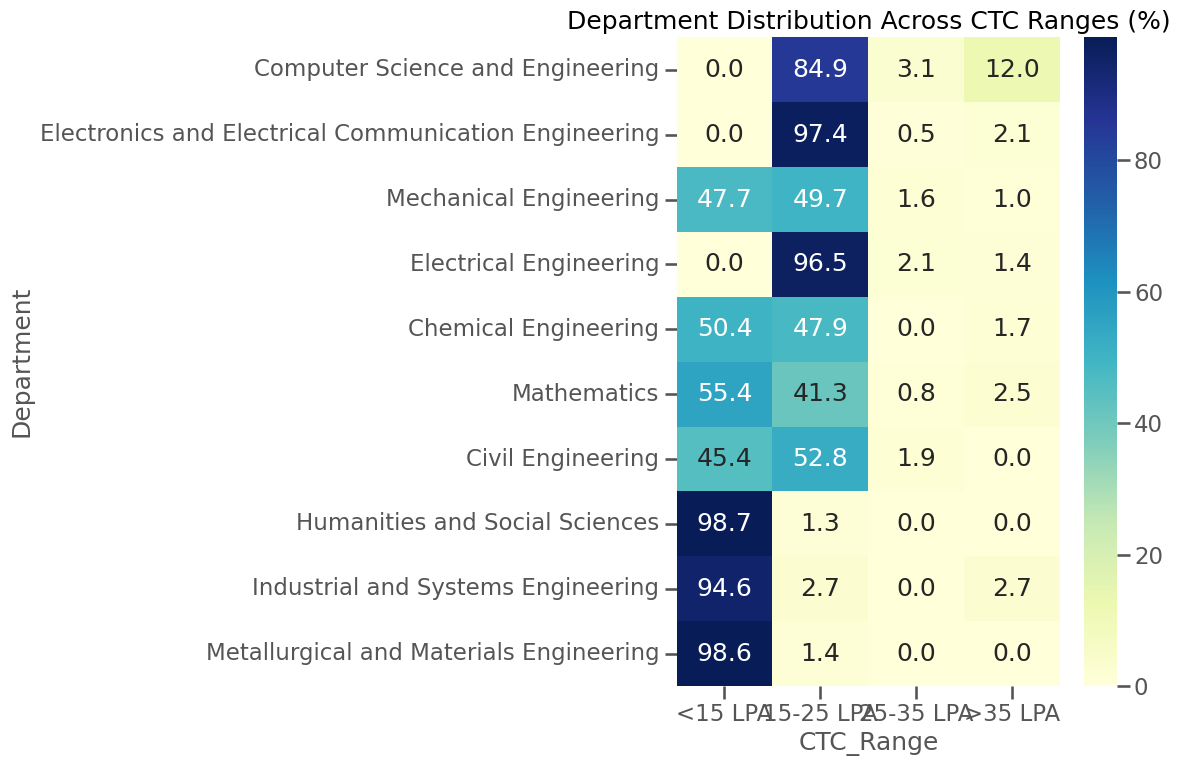

In [ ]:
# Create CTC ranges
bins = [0, 15, 25, 35, 100]
labels = ['<15 LPA', '15-25 LPA', '25-35 LPA', '>35 LPA']
df['CTC_Range'] = pd.cut(df['CTC (LPA)'], bins=bins, labels=labels)

# Department distribution across CTC ranges
ctc_dept_dist = pd.crosstab(df['Department'], df['CTC_Range'])
ctc_dept_dist_pct = ctc_dept_dist.div(ctc_dept_dist.sum(axis=1), axis=0) * 100

# Select top 10 departments by total count
top_depts = df['Department'].value_counts().head(10).index
ctc_dept_dist_pct = ctc_dept_dist_pct.loc[top_depts]

print("\nDepartment Distribution Across CTC Ranges (%):")
print(ctc_dept_dist_pct)

# Plot heatmap of department distribution across CTC ranges
plt.figure(figsize=(12, 8))
sns.heatmap(ctc_dept_dist_pct, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Department Distribution Across CTC Ranges (%)')
plt.tight_layout()
plt.show()


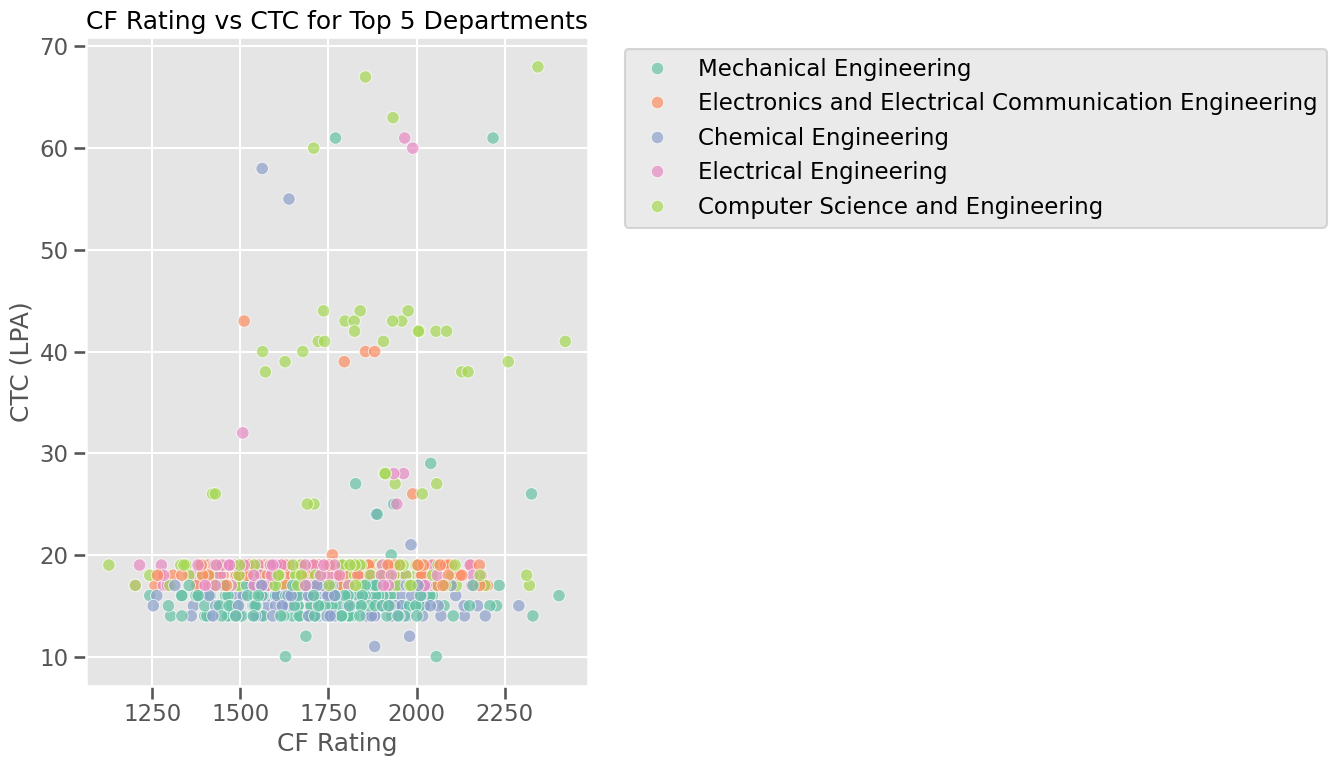

<ipython-input-60-d25ec03fedbc>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cf_ctc = df.groupby('CF_Range')['CTC (LPA)'].agg(['mean', 'count']).reset_index()


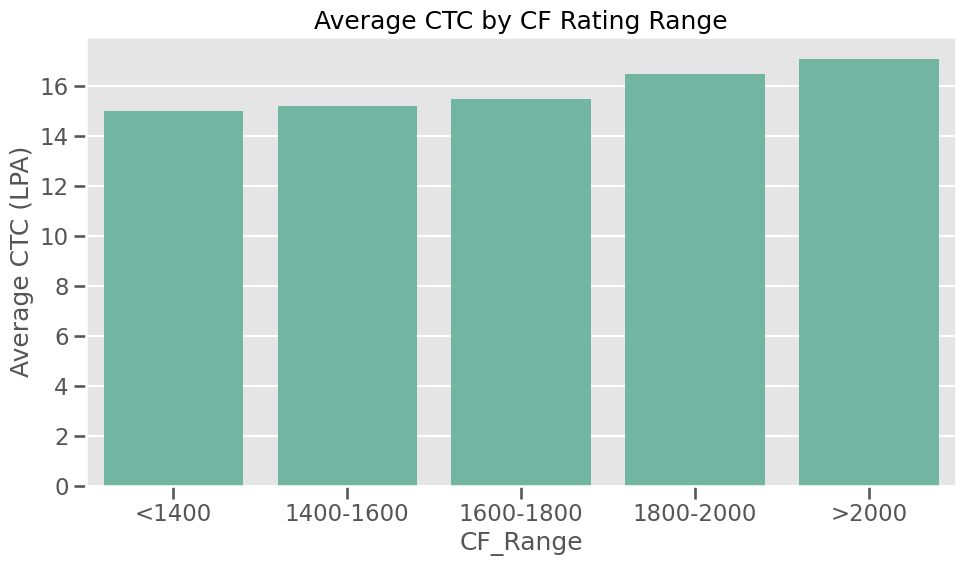

In [ ]:
# CF Rating vs CTC by Department
plt.figure(figsize=(14, 8))
top_5_depts = df['Department'].value_counts().head(5).index
dept_subset = df[df['Department'].isin(top_5_depts)]

sns.scatterplot(x='CF Rating', y='CTC (LPA)', hue='Department', data=dept_subset, alpha=0.7)
plt.title('CF Rating vs CTC for Top 5 Departments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# CF Rating ranges
cf_bins = [0, 1400, 1600, 1800, 2000, 2500]
cf_labels = ['<1400', '1400-1600', '1600-1800', '1800-2000', '>2000']
df['CF_Range'] = pd.cut(df['CF Rating'], bins=cf_bins, labels=cf_labels)

# Average CTC by CF Rating range
cf_ctc = df.groupby('CF_Range')['CTC (LPA)'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CF_Range', y='mean', data=cf_ctc)
plt.title('Average CTC by CF Rating Range')
plt.ylabel('Average CTC (LPA)')
plt.tight_layout()
plt.show()


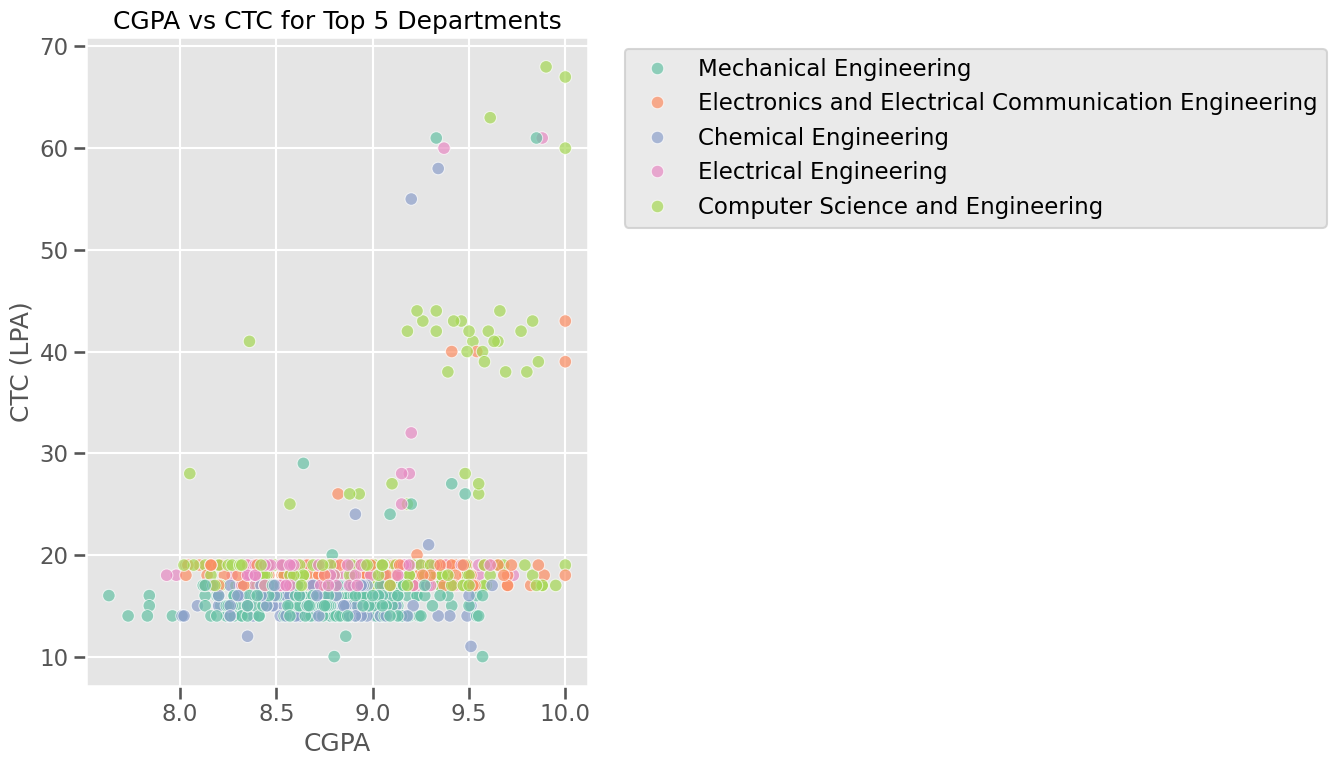

<ipython-input-61-deab2eb8dfec>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cgpa_ctc = df.groupby('CGPA_Range')['CTC (LPA)'].agg(['mean', 'count']).reset_index()


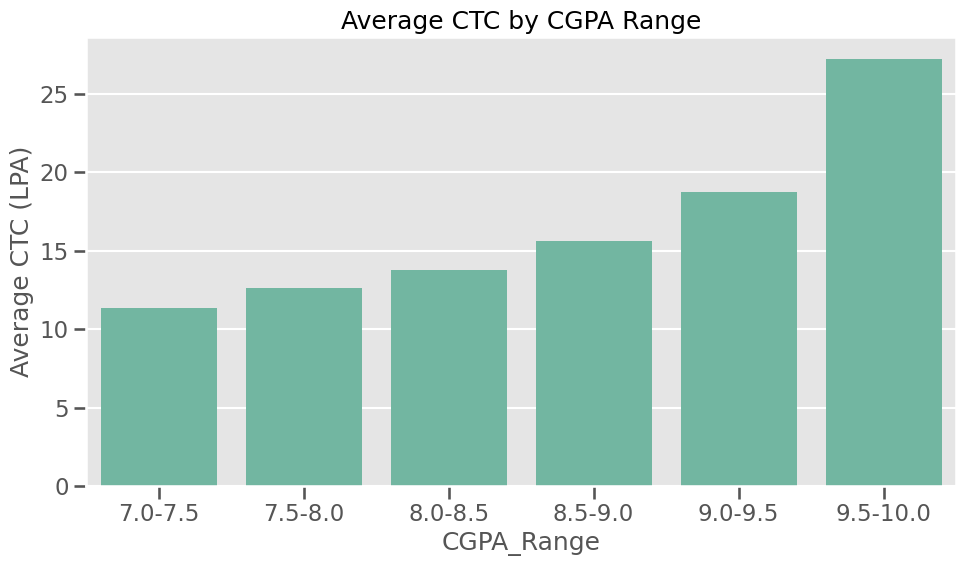

In [ ]:
# CGPA vs CTC by Department
plt.figure(figsize=(14, 8))
sns.scatterplot(x='CGPA', y='CTC (LPA)', hue='Department', data=dept_subset, alpha=0.7)
plt.title('CGPA vs CTC for Top 5 Departments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# CGPA ranges
cgpa_bins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
cgpa_labels = ['7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.0', '9.0-9.5', '9.5-10.0']
df['CGPA_Range'] = pd.cut(df['CGPA'], bins=cgpa_bins, labels=cgpa_labels)

# Average CTC by CGPA range
cgpa_ctc = df.groupby('CGPA_Range')['CTC (LPA)'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CGPA_Range', y='mean', data=cgpa_ctc)
plt.title('Average CTC by CGPA Range')
plt.ylabel('Average CTC (LPA)')
plt.tight_layout()
plt.show()


#FROM HERE, ABOVE IS NOT PART OF THE ANALYSIS

In [3]:
df = pd.read_excel('/content/AI and Ethics.xlsx')
df

Roll No                    Name              Company Department  \
0    20AR10049     VIDISHA VINIT KUMAR       AB InBev India         AR   
1    20ME3FP39         PRIYANSHU NANDA  Auronova Consulting         ME   
2    20HS20039                  MOULIK  Auronova Consulting         HS   
3    20ME31015          DAIVIK AGRAWAL  Auronova Consulting         ME   
4    20NA30014           JOHAAN GEORGE       Axis Bank- BIU        NaN   
..         ...                     ...                  ...        ...   
981  20AG36015            RISHAV KUMAR          TURING - BA         AG   
982  20AG36006            ARYAN BORDIA          TURING - BA         AG   
983  23MA60R20  DEVENDRA KUMAR DANODIA              VIRTUSA         MA   
984  23MA60R09         SAYANTAN MANDAL              VIRTUSA         MA   
985  23MA40007       ARPIT VINAY DUBEY              VIRTUSA         MA   

     CGPA(out of 10)  CF rating  CTC(In lpa)  
0               8.01       1400           14  
1               8.12       1400           12  
2               7.86       1100           12  
3               7.90       1500           12  
4               8.03       1500           14  
..               ...        ...          ...  
981             6.30       1600           17  
982             7.42       1200           17  
983             8.22       1600           10  
984             6.42       1700           10  
985             8.10       1500           10  

[986 rows x 7 columns]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_context("talk")

def load_all_sheets(file_path):
    all_sheets = pd.read_excel(file_path, sheet_name=None)

    combined_df = pd.DataFrame()
    for sheet_name, df in all_sheets.items():
        if 'Roll No' not in df.columns and 'Company' in df.columns:
            df = df[['Company', 'Name', 'Roll No', 'Department', 'CTC(In lpa)', 'CF rating', 'CGPA(out of 10)']]
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

# Load the data
file_path = '/content/AI and Ethics.xlsx'
df = load_all_sheets(file_path)

# Basic data cleaning
df['CTC(In lpa)'] = pd.to_numeric(df['CTC(In lpa)'], errors='coerce')
df['CF rating'] = pd.to_numeric(df['CF rating'], errors='coerce')
df['CGPA(out of 10)'] = pd.to_numeric(df['CGPA(out of 10)'], errors='coerce')

# Extract batch year from Roll No (first two digits)
df['Batch'] = df['Roll No'].astype(str).str[:2].apply(lambda x: '20' + x if x.isdigit() else None)

# Print basic information
print(f"Total number of placement records: {len(df)}")
print(f"Number of unique companies: {df['Company'].nunique()}")
print(f"Number of unique departments: {df['Department'].nunique()}")


Total number of placement records: 986
Number of unique companies: 304
Number of unique departments: 31



Basic Statistics:
       CTC(In lpa)    CF rating  CGPA(out of 10)
count   986.000000   986.000000       986.000000
mean     22.597363  1467.849899         8.120345
std      14.807707   130.717822         0.771153
min      10.000000  1100.000000         6.010000
25%      16.000000  1400.000000         7.630000
50%      18.000000  1500.000000         8.215000
75%      21.000000  1600.000000         8.680000
max     140.000000  2000.000000         9.690000


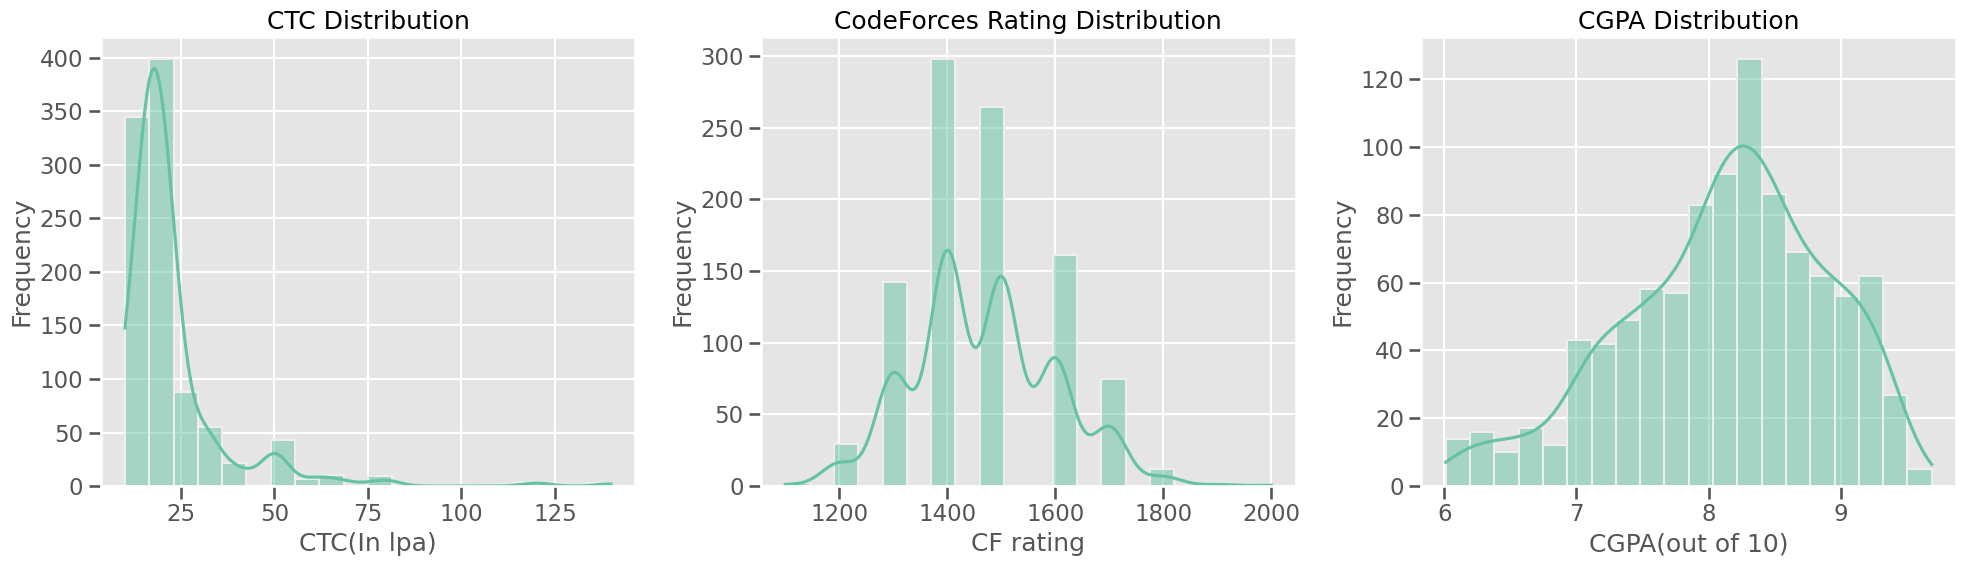

In [5]:
# Basic statistics for numerical columns
stats = df[['CTC(In lpa)', 'CF rating', 'CGPA(out of 10)']].describe()
print("\nBasic Statistics:")
print(stats)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# CTC
sns.histplot(df['CTC(In lpa)'], kde=True, ax=axes[0], bins=20)
axes[0].set_title('CTC Distribution')
axes[0].set_xlabel('CTC(In lpa)')
axes[0].set_ylabel('Frequency')

# CF
sns.histplot(df['CF rating'], kde=True, ax=axes[1], bins=20)
axes[1].set_title('CodeForces Rating Distribution')
axes[1].set_xlabel('CF rating')
axes[1].set_ylabel('Frequency')

# CGPA
sns.histplot(df['CGPA(out of 10)'], kde=True, ax=axes[2], bins=20)
axes[2].set_title('CGPA Distribution')
axes[2].set_xlabel('CGPA(out of 10)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Department-wise Analysis (Top 10 by Avg CTC):
           CTC(In lpa)                          CF rating              \
                  mean median min  max count         mean         std   
Department                                                              
ES           38.000000   49.0  16   49     3  1433.333333   57.735027   
CS           35.683333   24.0  10  140   120  1564.166667  138.900746   
MA           29.621212   21.0  10  140    66  1506.060606  136.864658   
AG           26.928571   19.5  10   80    28  1467.857143  138.920631   
IE           25.250000   18.0  14   80    16  1468.750000  113.834675   
EC           24.448598   21.0  14   50   107  1514.018692  106.796048   
AT           22.285714   21.0  16   28     7  1357.142857   97.590007   
GG           21.777778   21.0  14   32     9  1444.444444  133.333333   
QE           20.750000   19.5  14   40     8  1487.500000   99.103121   
EE           20.282051   17.0  10   52    78  1470.512821  127.012602   

   

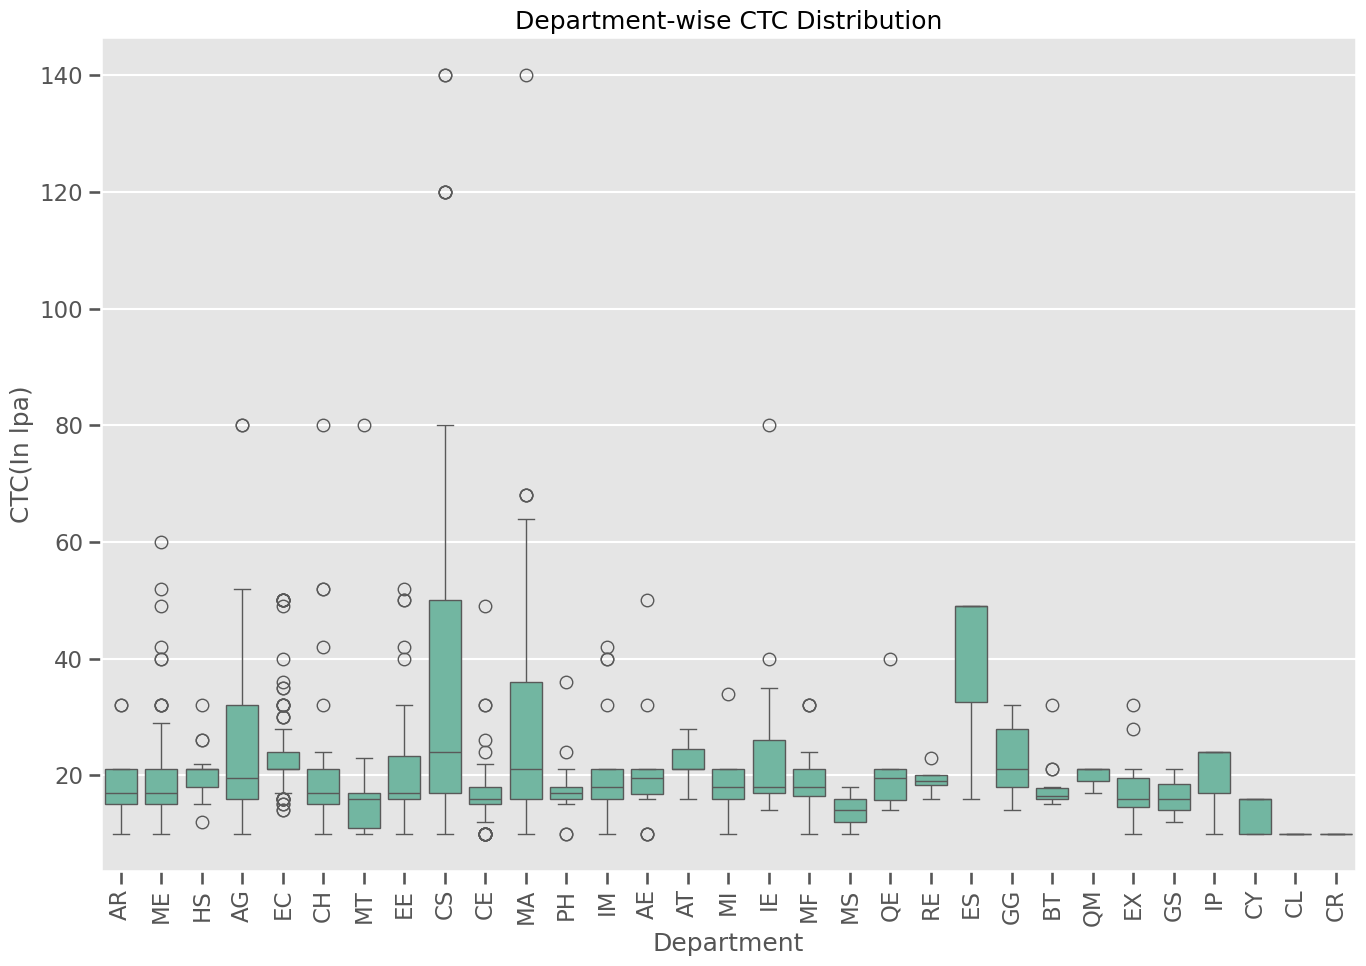

/tmp/ipython-input-6-2968558275.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department', y='CTC(In lpa)', data=dept_subset, estimator=np.mean, ci=None)


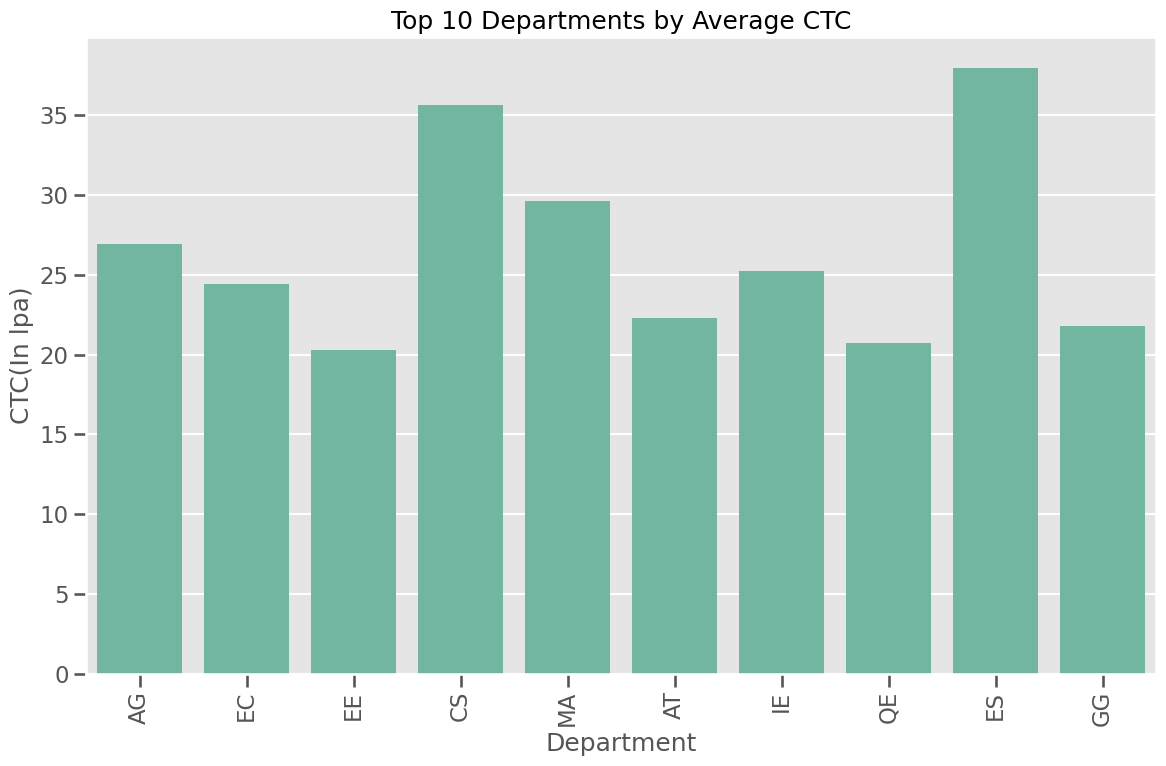

In [6]:
# Department-wise average CTC, CF Rating, and CGPA
dept_analysis = df.groupby('Department').agg({
    'CTC(In lpa)': ['mean', 'median', 'min', 'max', 'count'],
    'CF rating': ['mean', 'std'],
    'CGPA(out of 10)': ['mean', 'std']
}).sort_values(('CTC(In lpa)', 'mean'), ascending=False)

print("\nDepartment-wise Analysis (Top 10 by Avg CTC):")
print(dept_analysis.head(10))

# Plot
plt.figure(figsize=(14, 10))
sns.boxplot(x='Department', y='CTC(In lpa)', data=df)
plt.xticks(rotation=90)
plt.title('Department-wise CTC Distribution')
plt.tight_layout()
plt.show()

# Top 10 deps(avg ctc)
top_depts = dept_analysis.head(10).index
dept_subset = df[df['Department'].isin(top_depts)]

plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='CTC(In lpa)', data=dept_subset, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('Top 10 Departments by Average CTC')
plt.tight_layout()
plt.show()



Top 15 Companies by Number of Offers:
Company
AMEX                           19
Bank of America                19
NSE                            18
AXTRIA                         16
ICICI Bank                     16
Tiger Analytics                16
Microsoft_Software Engineer    15
Qualcomm                       15
ACCENTURE S&C                  14
L&T                            13
Meesho_SDE-I                   12
TURING                         12
Deloitte USI                   11
TI ANALOG ENGINEER             10
Saint -Gobain Research          9
Name: count, dtype: int64

Top 15 Companies by Average CTC (with at least 3 offers):
                                                CTC(In lpa)        \
                                                       mean count   
Company                                                             
GLEAN_Software Engineer                               140.0     3   
Squarepoint Capital_Graduate Software Developer        68.0     3   
De Shaw_Softw

/tmp/ipython-input-7-2288557019.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='CTC(In lpa)', data=company_subset, estimator=np.mean, ci=None)


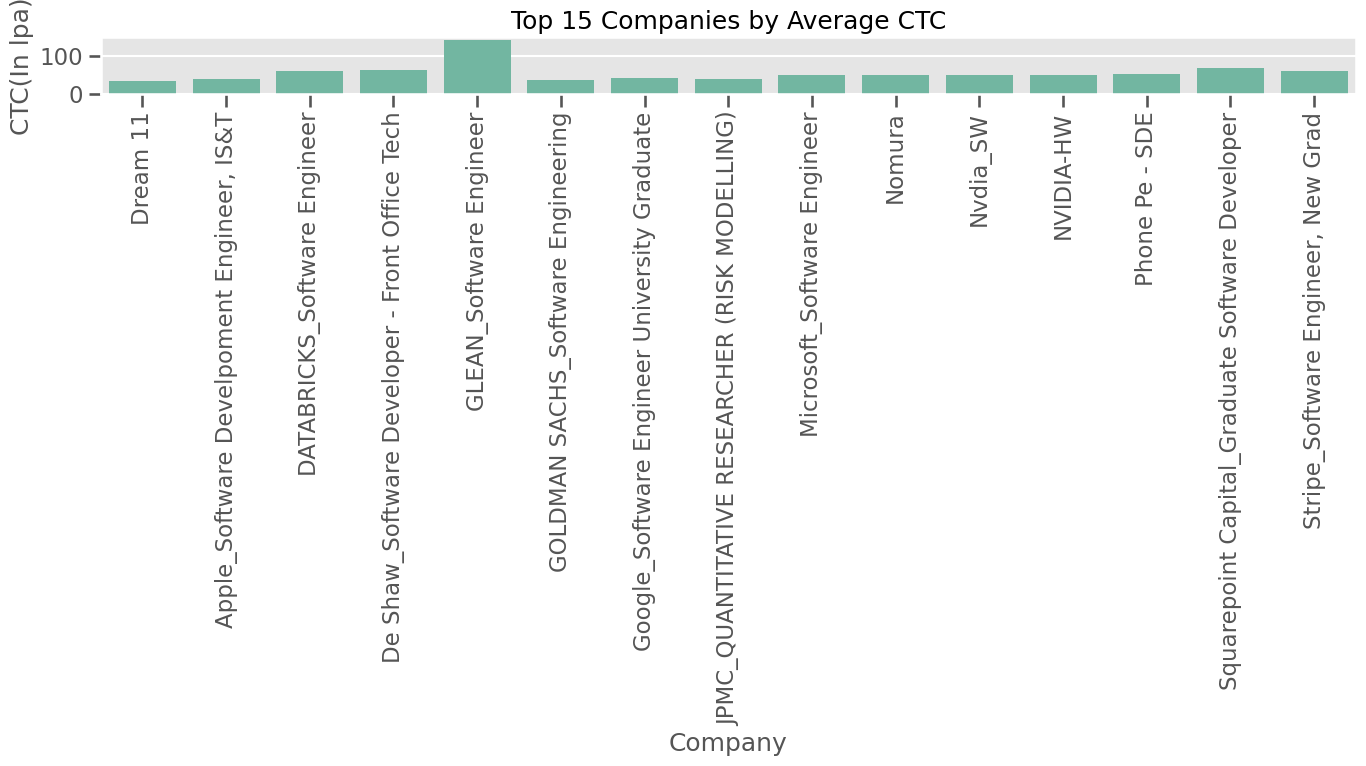

In [7]:
# Top 15 companies by number of offers
company_counts = df['Company'].value_counts().head(15)
print("\nTop 15 Companies by Number of Offers:")
print(company_counts)

# Top 15 companies by average CTC
company_ctc = df.groupby('Company').agg({
    'CTC(In lpa)': ['mean', 'count'],
    'Department': lambda x: list(set(x))
}).sort_values(('CTC(In lpa)', 'mean'), ascending=False)

company_ctc = company_ctc[company_ctc[('CTC(In lpa)', 'count')] >= 3]  # At least 3 offers
print("\nTop 15 Companies by Average CTC (with at least 3 offers):")
print(company_ctc.head(15))

# Plot top 15 companies by average CTC
top_companies = company_ctc.head(15).index
company_subset = df[df['Company'].isin(top_companies)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Company', y='CTC(In lpa)', data=company_subset, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title('Top 15 Companies by Average CTC')
plt.tight_layout()
plt.show()



Correlation Matrix:
                 CTC(In lpa)  CF rating  CGPA(out of 10)
CTC(In lpa)         1.000000   0.330398         0.385374
CF rating           0.330398   1.000000         0.140505
CGPA(out of 10)     0.385374   0.140505         1.000000


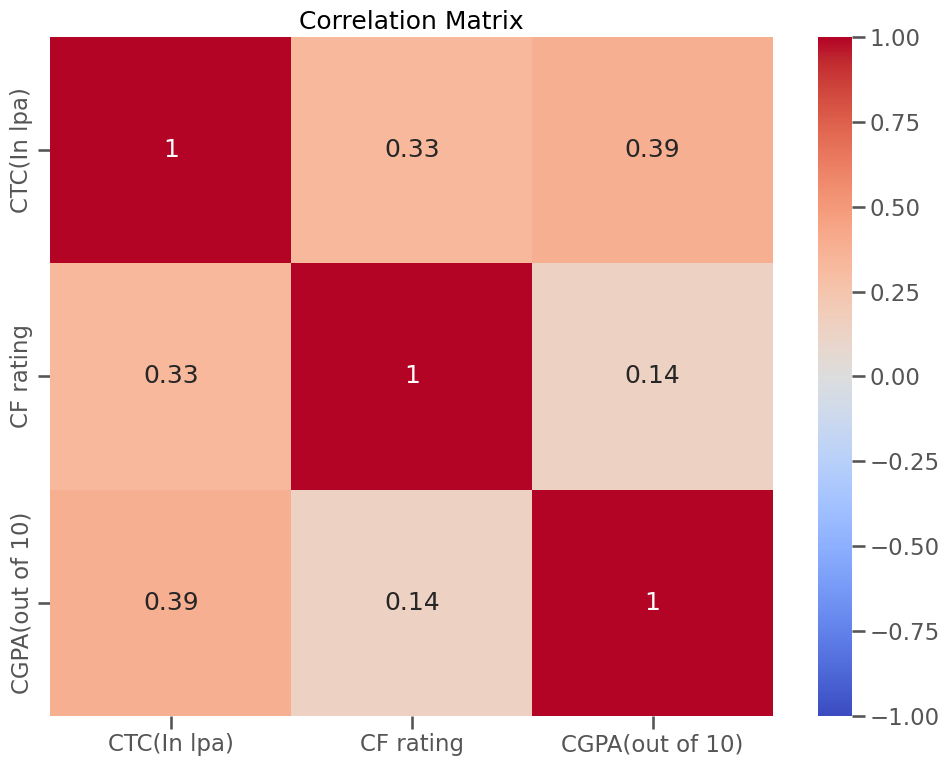

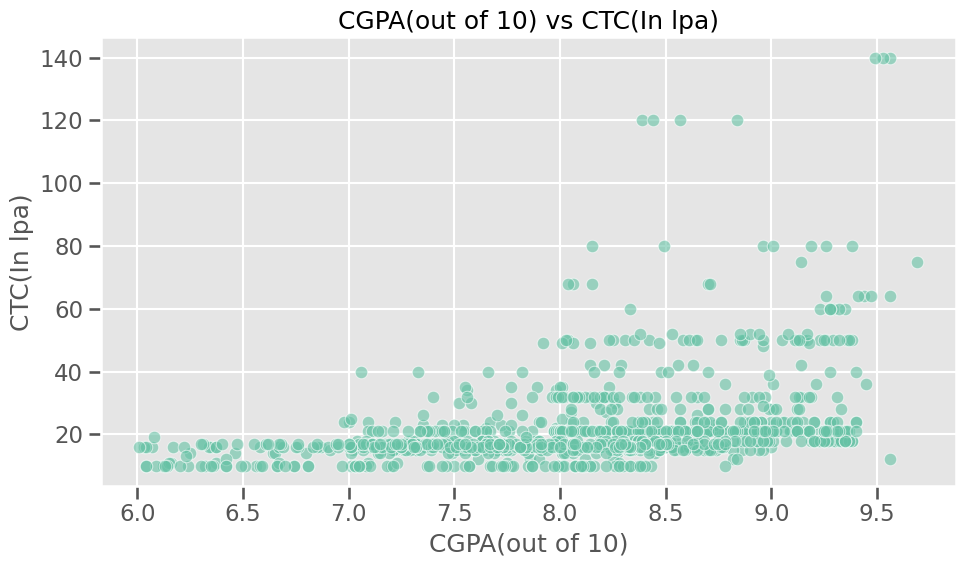

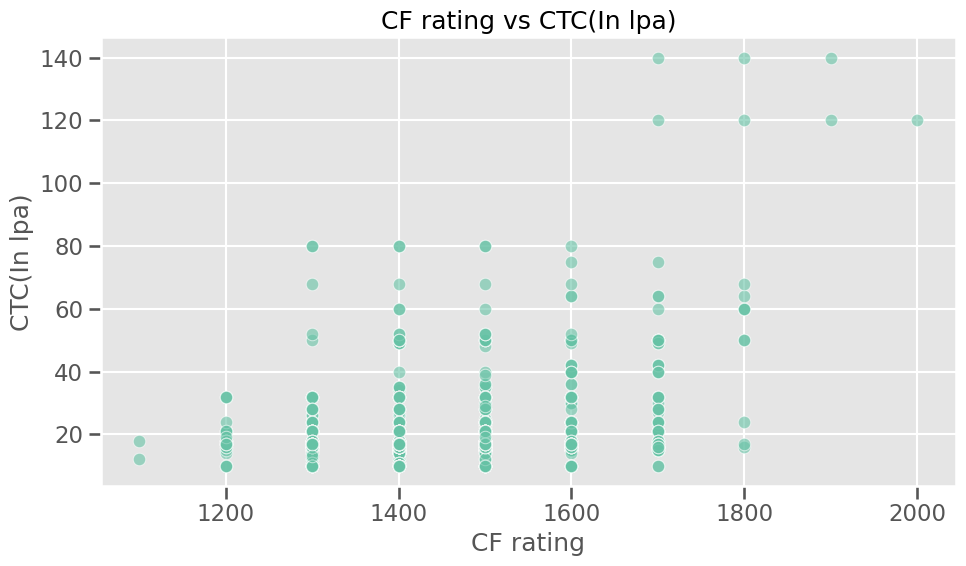

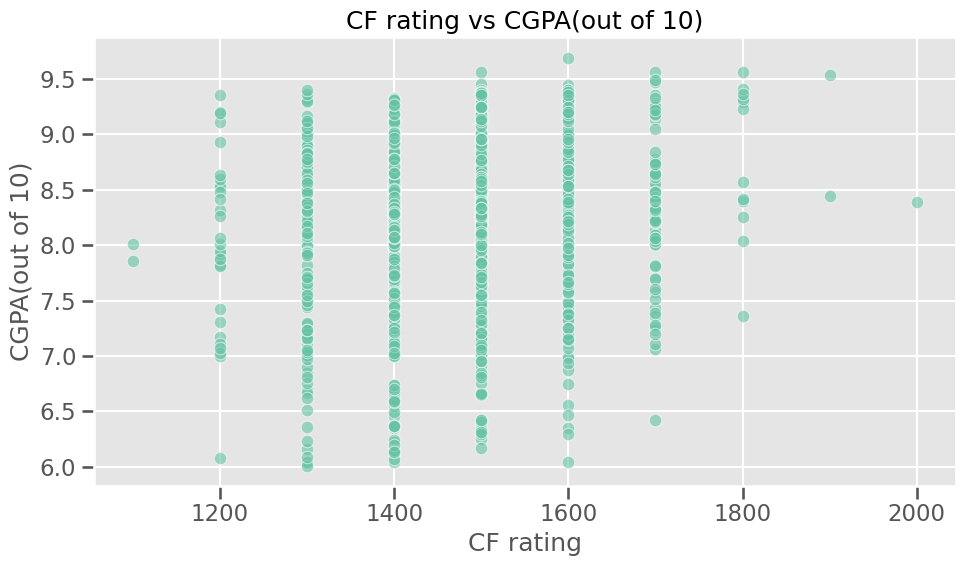

In [8]:
# Calculate correlations
correlation = df[['CTC(In lpa)', 'CF rating', 'CGPA(out of 10)']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plot: CGPA vs CTC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CGPA(out of 10)', y='CTC(In lpa)', data=df, alpha=0.6)
plt.title('CGPA(out of 10) vs CTC(In lpa)')
plt.tight_layout()
plt.show()

# Scatter plot: CF Rating vs CTC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CF rating', y='CTC(In lpa)', data=df, alpha=0.6)
plt.title('CF rating vs CTC(In lpa)')
plt.tight_layout()
plt.show()

# Scatter plot: CF Rating vs CGPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CF rating', y='CGPA(out of 10)', data=df, alpha=0.6)
plt.title('CF rating vs CGPA(out of 10)')
plt.tight_layout()
plt.show()



Batch-wise Analysis:
      CTC(In lpa)                 CF rating CGPA(out of 10)
             mean median count         mean            mean
Batch                                                      
2018    18.000000   18.0     1  1400.000000        7.300000
2020    24.076010   21.0   421  1468.646081        8.142708
2021    23.549254   18.0   335  1468.358209        8.188687
2022    20.444444   24.0     9  1388.888889        8.473333
2023    18.447489   17.0   219  1469.863014        7.961598


/tmp/ipython-input-9-1034125330.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Batch', y='CTC(In lpa)', data=df, estimator=np.mean, ci=None, marker='o')


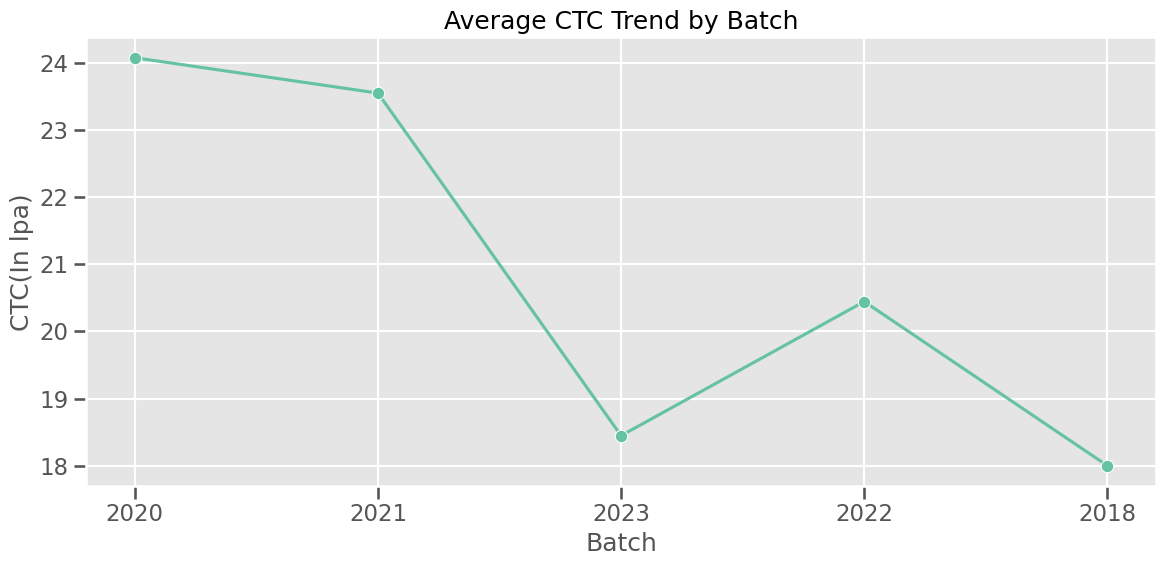

In [9]:
# Batch-wise analysis
batch_analysis = df.groupby('Batch').agg({
    'CTC(In lpa)': ['mean', 'median', 'count'],
    'CF rating': ['mean'],
    'CGPA(out of 10)': ['mean']
}).sort_values('Batch')

print("\nBatch-wise Analysis:")
print(batch_analysis)

# Plot batch-wise CTC trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Batch', y='CTC(In lpa)', data=df, estimator=np.mean, ci=None, marker='o')
plt.title('Average CTC Trend by Batch')
plt.grid(True)
plt.tight_layout()
plt.show()



Top-Tier vs Other Companies Comparison:
         CTC(In lpa)                 CF rating CGPA(out of 10)
                mean median count         mean            mean
Top_Tier                                                      
False      21.994802   18.0   962  1463.097713        8.108462
True       46.750000   50.0    24  1658.333333        8.596667


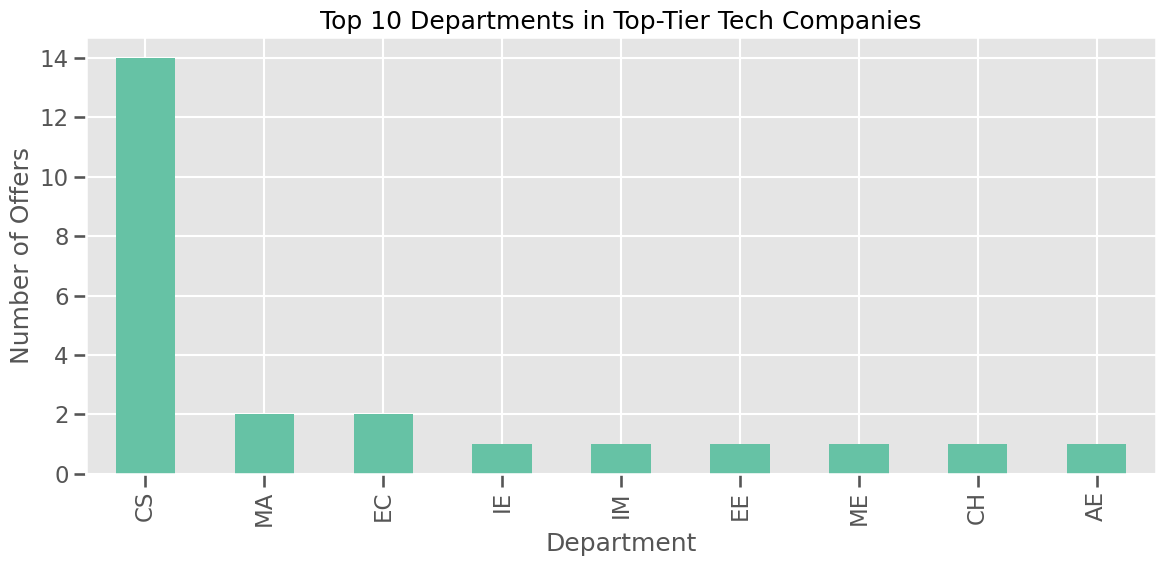

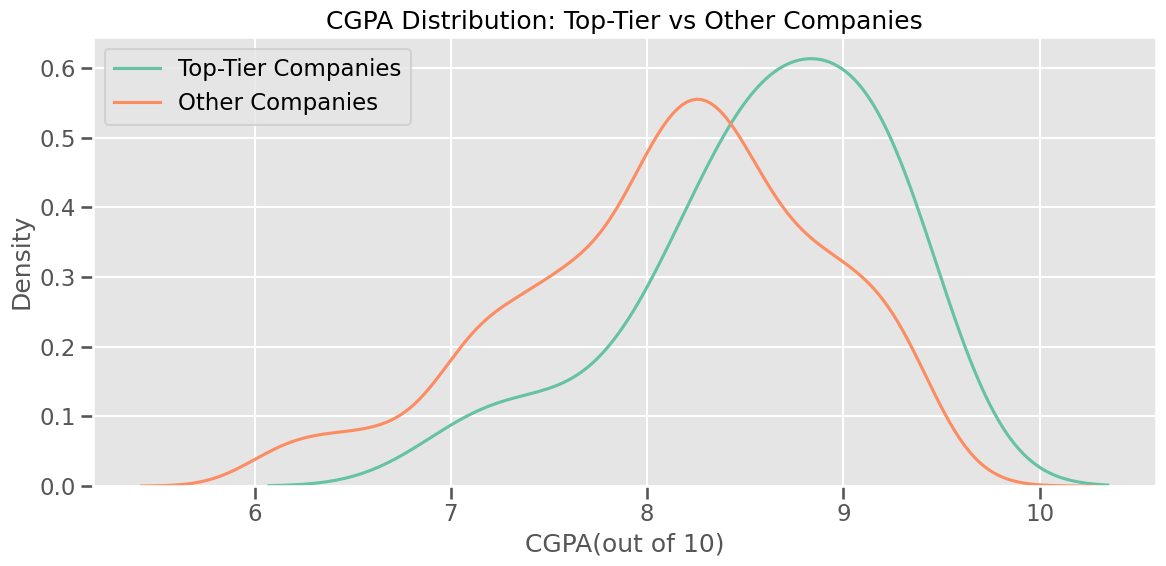

In [10]:
# Define top-tier tech companies
top_tier_companies = ['Google', 'Microsoft', 'Amazon', 'Apple', 'Facebook', 'Goldman Sachs']

# Create a flag for top-tier companies
df['Top_Tier'] = df['Company'].apply(lambda x: any(company in str(x) for company in top_tier_companies))

# Compare top-tier vs other companies
tier_comparison = df.groupby('Top_Tier').agg({
    'CTC(In lpa)': ['mean', 'median', 'count'],
    'CF rating': ['mean'],
    'CGPA(out of 10)': ['mean']
})

print("\nTop-Tier vs Other Companies Comparison:")
print(tier_comparison)

# Department distribution in top-tier companies
top_tier_df = df[df['Top_Tier']]
dept_in_top_tier = top_tier_df['Department'].value_counts().head(10)

plt.figure(figsize=(12, 6))
dept_in_top_tier.plot(kind='bar')
plt.title('Top 10 Departments in Top-Tier Tech Companies')
plt.ylabel('Number of Offers')
plt.tight_layout()
plt.show()

# CGPA distribution: Top-tier vs Others
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Top_Tier']]['CGPA(out of 10)'], label='Top-Tier Companies')
sns.kdeplot(df[~df['Top_Tier']]['CGPA(out of 10)'], label='Other Companies')
plt.title('CGPA Distribution: Top-Tier vs Other Companies')
plt.xlabel('CGPA(out of 10)')
plt.legend()
plt.tight_layout()
plt.show()



Department Distribution Across CTC Ranges (%):
CTC_Range     <15 LPA  15-25 LPA  25-35 LPA    >35 LPA
Department                                            
CS           6.140351  54.385965  10.526316  28.947368
EC           3.738318  73.831776  13.084112   9.345794
ME          29.523810  56.190476   8.571429   5.714286
EE          21.794872  57.692308  14.102564   6.410256
MA          13.846154  50.769231   9.230769  26.153846
CH          27.272727  65.151515   1.515152   6.060606
CE          36.666667  56.666667   5.000000   1.666667
IM          20.930233  69.767442   2.325581   6.976744
HS           7.317073  85.365854   7.317073   0.000000
MT          48.717949  48.717949   0.000000   2.564103


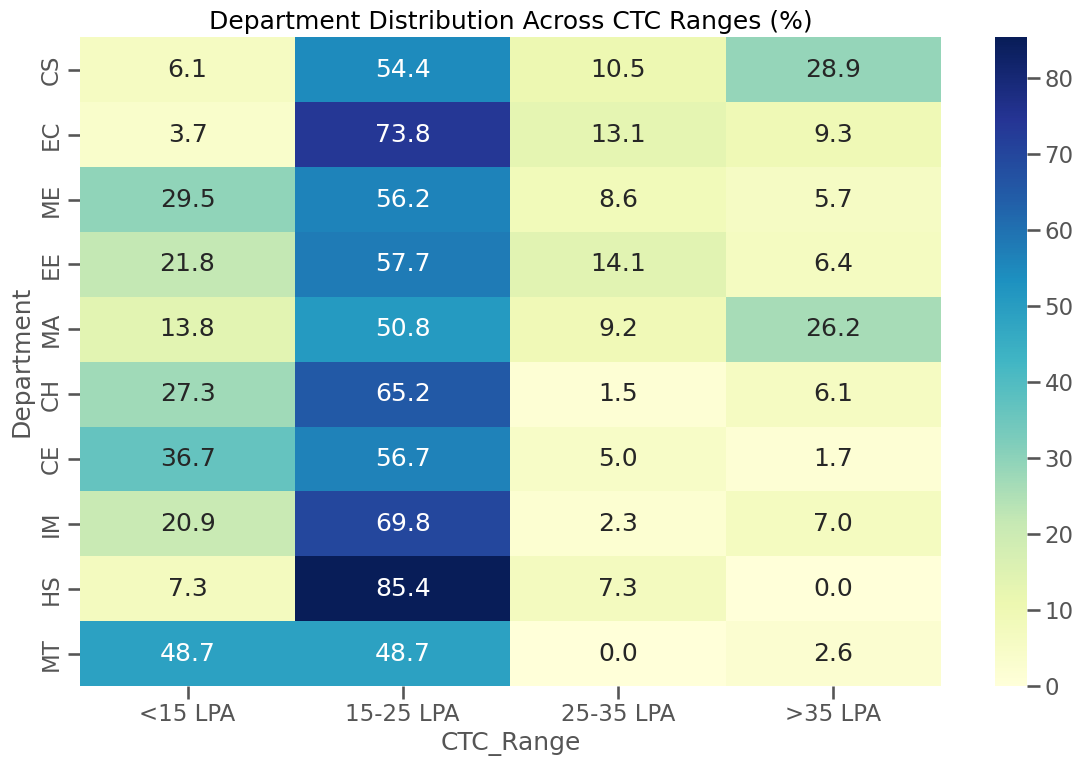

In [11]:
# Create CTC ranges
bins = [0, 15, 25, 35, 100]
labels = ['<15 LPA', '15-25 LPA', '25-35 LPA', '>35 LPA']
df['CTC_Range'] = pd.cut(df['CTC(In lpa)'], bins=bins, labels=labels)

# Department distribution across CTC ranges
ctc_dept_dist = pd.crosstab(df['Department'], df['CTC_Range'])
ctc_dept_dist_pct = ctc_dept_dist.div(ctc_dept_dist.sum(axis=1), axis=0) * 100

# Select top 10 departments by total count
top_depts = df['Department'].value_counts().head(10).index
ctc_dept_dist_pct = ctc_dept_dist_pct.loc[top_depts]

print("\nDepartment Distribution Across CTC Ranges (%):")
print(ctc_dept_dist_pct)

# Plot heatmap of department distribution across CTC ranges
plt.figure(figsize=(12, 8))
sns.heatmap(ctc_dept_dist_pct, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Department Distribution Across CTC Ranges (%)')
plt.tight_layout()
plt.show()


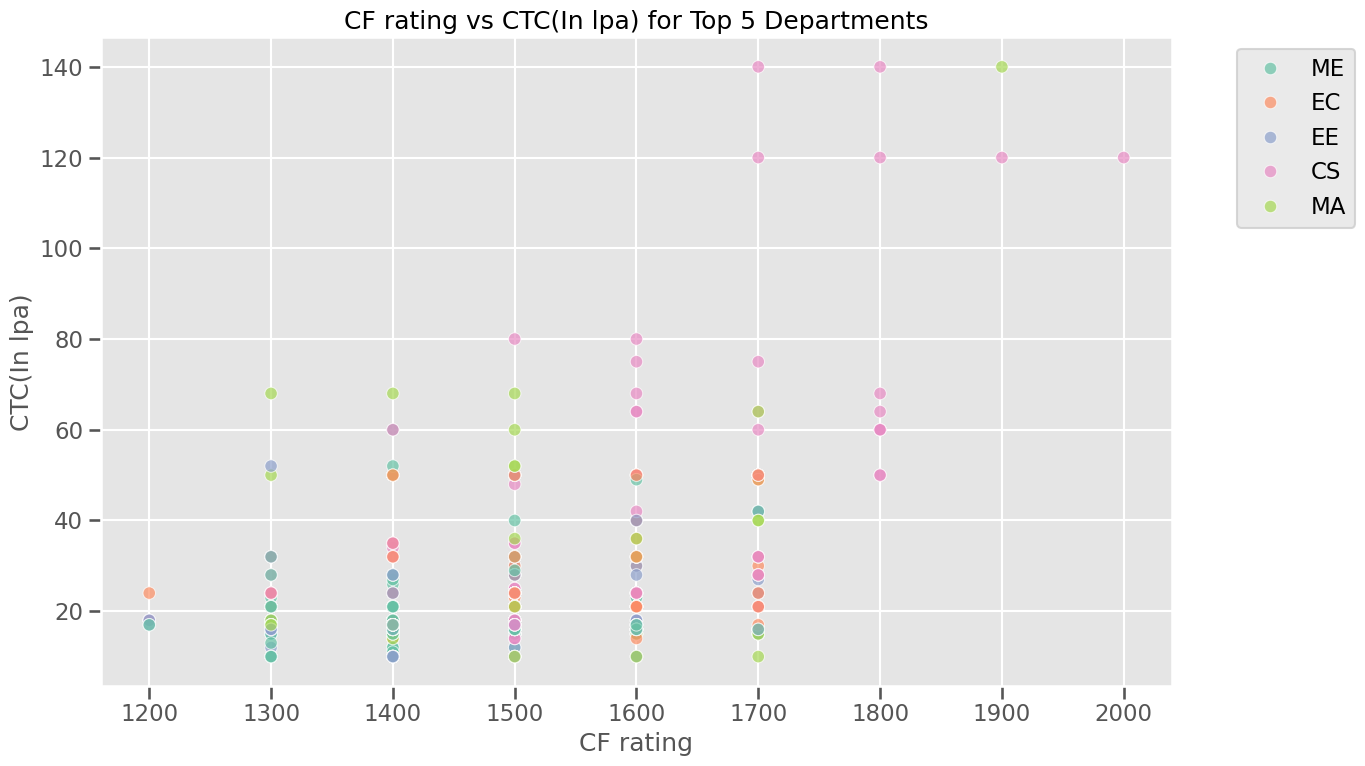

/tmp/ipython-input-12-3094446464.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cf_ctc = df.groupby('CF_Range')['CTC(In lpa)'].agg(['mean', 'count']).reset_index()


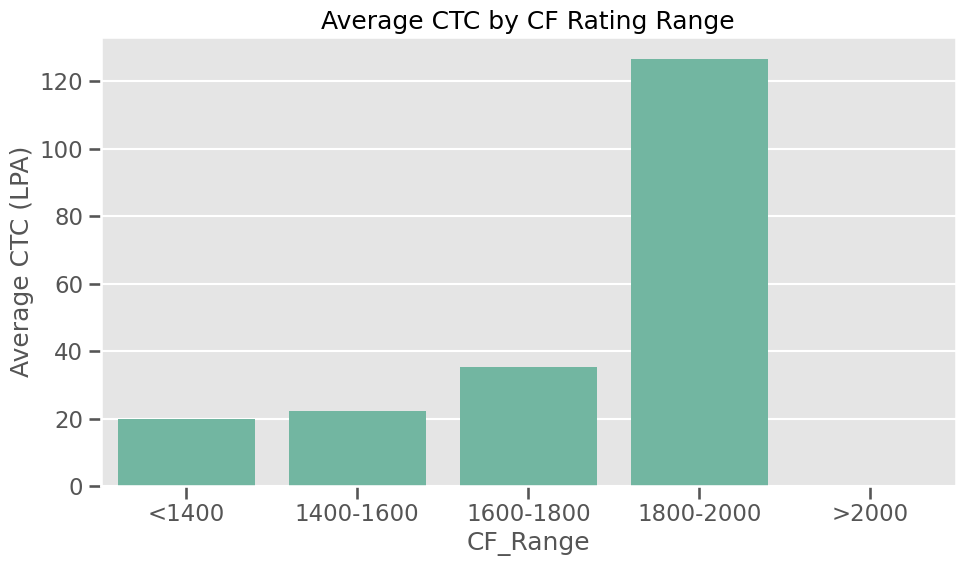

In [12]:
# CF Rating vs CTC by Department
plt.figure(figsize=(14, 8))
top_5_depts = df['Department'].value_counts().head(5).index
dept_subset = df[df['Department'].isin(top_5_depts)]

sns.scatterplot(x='CF rating', y='CTC(In lpa)', hue='Department', data=dept_subset, alpha=0.7)
plt.title('CF rating vs CTC(In lpa) for Top 5 Departments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# CF Rating ranges
cf_bins = [0, 1400, 1600, 1800, 2000, 2500]
cf_labels = ['<1400', '1400-1600', '1600-1800', '1800-2000', '>2000']
df['CF_Range'] = pd.cut(df['CF rating'], bins=cf_bins, labels=cf_labels)

# Average CTC by CF Rating range
cf_ctc = df.groupby('CF_Range')['CTC(In lpa)'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CF_Range', y='mean', data=cf_ctc)
plt.title('Average CTC by CF Rating Range')
plt.ylabel('Average CTC (LPA)')
plt.tight_layout()
plt.show()


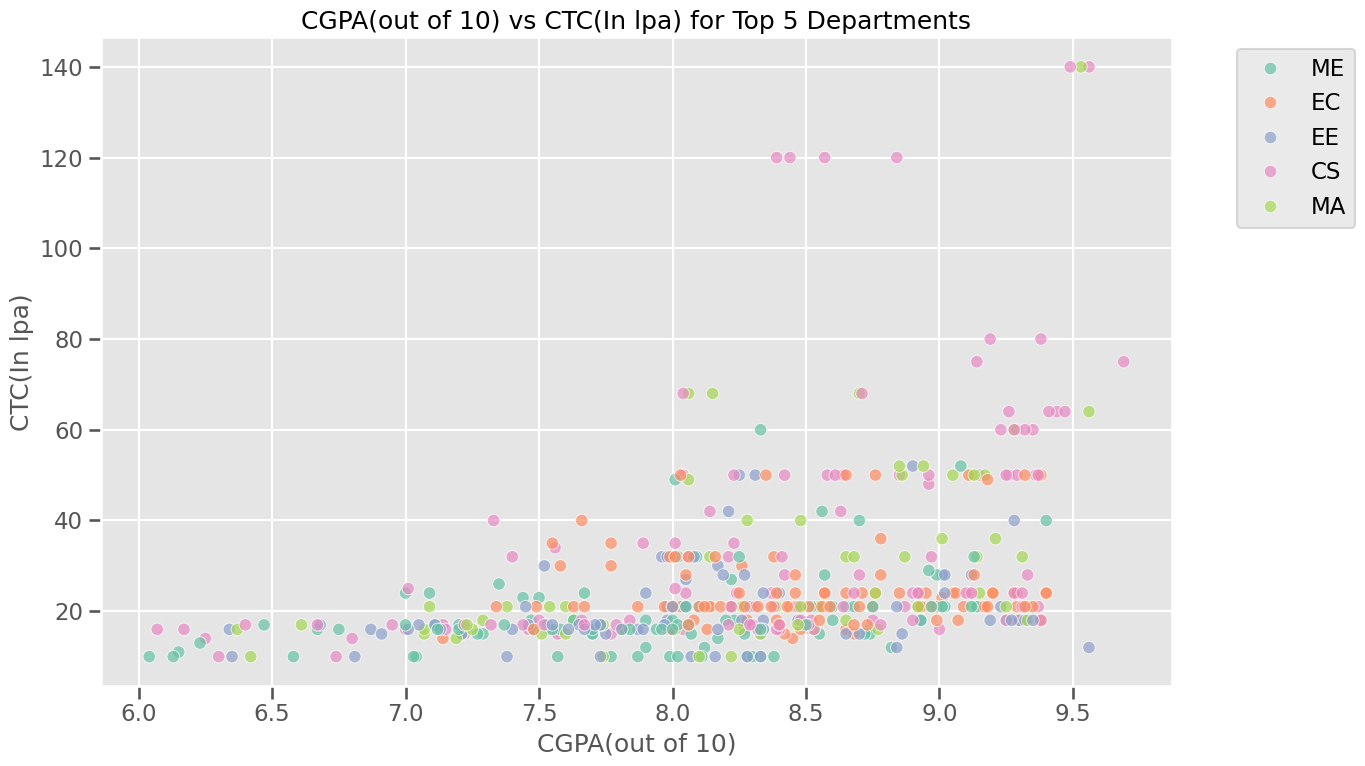

/tmp/ipython-input-13-3142970650.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cgpa_ctc = df.groupby('CGPA_Range')['CTC(In lpa)'].agg(['mean', 'count']).reset_index()


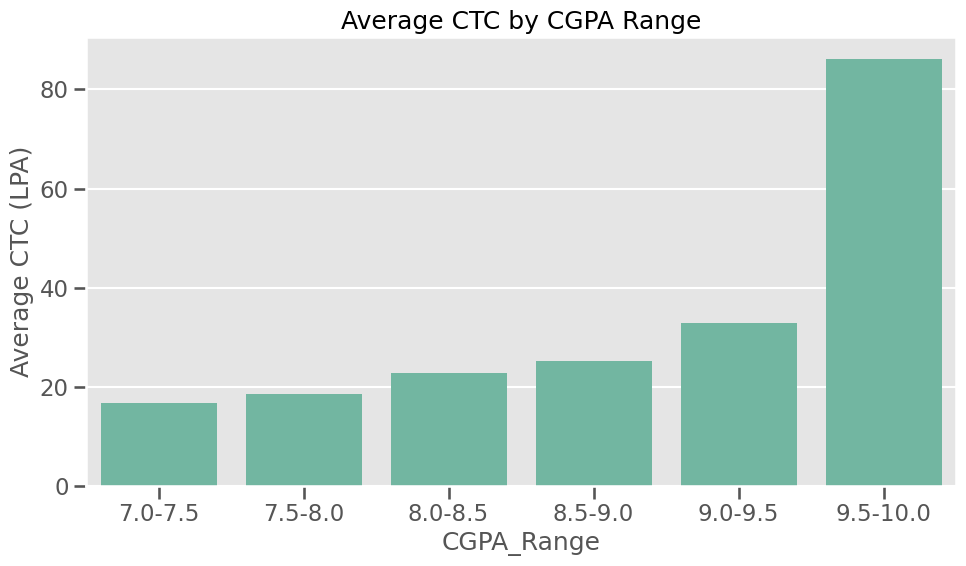

In [13]:
# CGPA vs CTC by Department
plt.figure(figsize=(14, 8))
sns.scatterplot(x='CGPA(out of 10)', y='CTC(In lpa)', hue='Department', data=dept_subset, alpha=0.7)
plt.title('CGPA(out of 10) vs CTC(In lpa) for Top 5 Departments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# CGPA ranges
cgpa_bins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
cgpa_labels = ['7.0-7.5', '7.5-8.0', '8.0-8.5', '8.5-9.0', '9.0-9.5', '9.5-10.0']
df['CGPA_Range'] = pd.cut(df['CGPA(out of 10)'], bins=cgpa_bins, labels=cgpa_labels)

# Average CTC by CGPA range
cgpa_ctc = df.groupby('CGPA_Range')['CTC(In lpa)'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CGPA_Range', y='mean', data=cgpa_ctc)
plt.title('Average CTC by CGPA Range')
plt.ylabel('Average CTC (LPA)')
plt.tight_layout()
plt.show()


In [15]:
# Load the final dataset
df = pd.read_excel('/content/AI and Ethics.xlsx', sheet_name='Table 1')

# Data preprocessing
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values in Department column
df['Department'] = df['Department'].fillna('Unknown')

# Create binary target variable (placed = 1, not placed = 0)
# Since all students in this dataset are placed, we'll create a synthetic scenario
# based on CTC thresholds for demonstration (to get info about fairness in the data)
df['Placed'] = (df['CTC(In lpa)'] >= df['CTC(In lpa)'].median()).astype(int)
# here placed means that the ctc >= median

print(f"\nPlacement distribution:")
print(df['Placed'].value_counts())


Dataset shape: (986, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Roll No          985 non-null    object 
 1   Name             985 non-null    object 
 2   Company          986 non-null    object 
 3   Department       967 non-null    object 
 4   CGPA(out of 10)  986 non-null    float64
 5   CF rating        986 non-null    int64  
 6   CTC(In lpa)      986 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 54.1+ KB
None

Missing values:
Roll No             1
Name                1
Company             0
Department         19
CGPA(out of 10)     0
CF rating           0
CTC(In lpa)         0
dtype: int64

Placement distribution:
Placed
1    553
0    433
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Feature engineering
features = ['CGPA(out of 10)', 'CF rating', 'Department'] # relevant
X = df[features].copy()
y = df['Placed']


dept_encoder = OneHotEncoder(sparse_output=False, drop='first')
dept_encoded = dept_encoder.fit_transform(X[['Department']])
dept_columns = [f'Dept_{col}' for col in dept_encoder.get_feature_names_out(['Department'])]

X_numerical = X[['CGPA(out of 10)', 'CF rating']].values
X_encoded = np.concatenate([X_numerical, dept_encoded], axis=1)

# Feature names for interpretability
feature_names = ['CGPA', 'CF_Rating'] + dept_columns

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.753

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       130
           1       0.76      0.81      0.79       166

    accuracy                           0.75       296
   macro avg       0.75      0.75      0.75       296
weighted avg       0.75      0.75      0.75       296



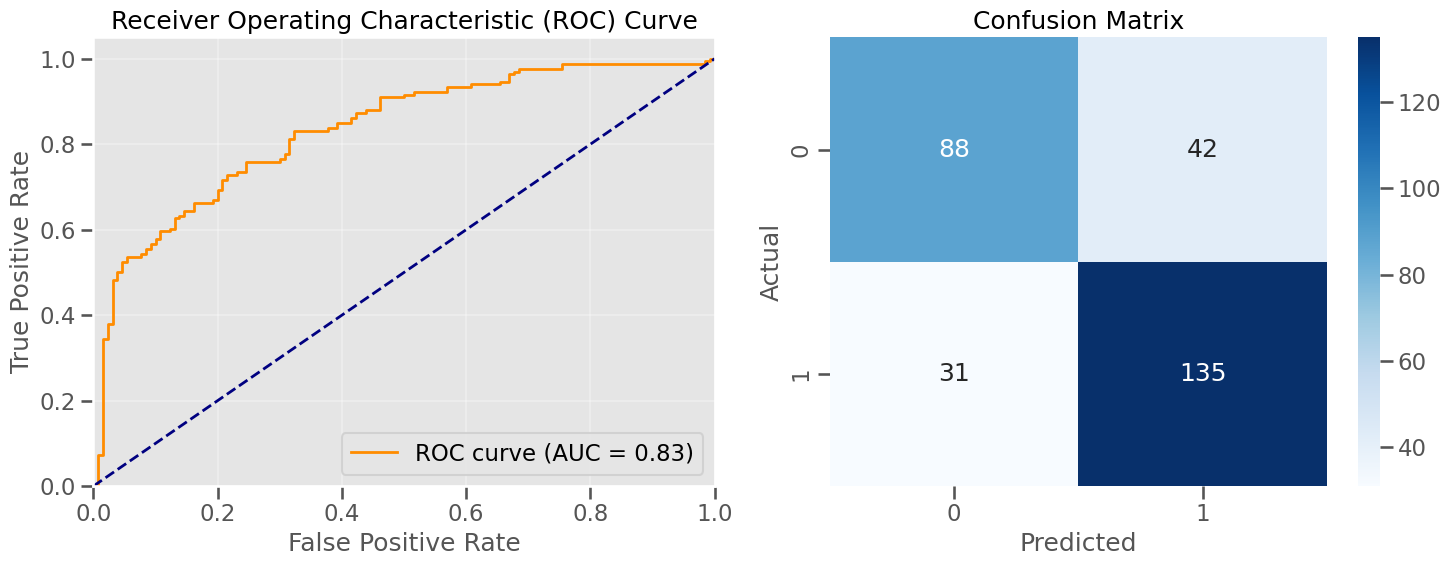


Feature Importance (Logistic Regression Coefficients):
               Feature  Coefficient  Abs_Coefficient
0                 CGPA     1.299383         1.299383
11  Dept_Department_CY    -0.465456         0.465456
6   Dept_Department_CE    -0.419287         0.419287
13  Dept_Department_EE    -0.372270         0.372270
23  Dept_Department_ME    -0.316273         0.316273
27  Dept_Department_MT    -0.279873         0.279873
20  Dept_Department_IM    -0.248293         0.248293
8   Dept_Department_CL    -0.233560         0.233560
30  Dept_Department_QM    -0.226998         0.226998
7   Dept_Department_CH    -0.222454         0.222454


In [17]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression Coefficients):")
print(feature_importance.head(10))


In [19]:
# Install required packages (run this if not already installed)
!pip install fairlearn aif360

from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import selection_rate, true_positive_rate, false_positive_rate

# Define sensitive attribute (Department groups)
# Group departments into broader categories for analysis
dept_mapping = {
    'CS': 'Engineering', 'EC': 'Engineering', 'EE': 'Engineering', 'ME': 'Engineering',
    'CE': 'Engineering', 'CH': 'Engineering', 'MT': 'Engineering', 'AE': 'Engineering',
    'MA': 'Sciences', 'PH': 'Sciences', 'CY': 'Sciences', 'GG': 'Sciences',
    'HS': 'Humanities', 'AR': 'Design', 'AG': 'Agriculture', 'BT': 'Biotechnology'
}

# Create sensitive attribute
df['Dept_Group'] = df['Department'].map(dept_mapping).fillna('Other')
sensitive_attr = df.loc[X_test.index if hasattr(X_test, 'index') else range(len(y_test)), 'Dept_Group'].values

# Calculate fairness metrics
def calculate_fairness_metrics(y_true, y_pred, sensitive_features):
    """Calculate various fairness metrics"""

    # Demographic Parity Difference
    dp_diff = demographic_parity_difference(y_true, y_pred, sensitive_features=sensitive_features)

    # Equalized Odds Difference
    eo_diff = equalized_odds_difference(y_true, y_pred, sensitive_features=sensitive_features)

    # Selection rates by group
    selection_rates = {}
    tpr_by_group = {}
    fpr_by_group = {}

    unique_groups = np.unique(sensitive_features)

    for group in unique_groups:
        group_mask = sensitive_features == group
        group_y_true = y_true[group_mask]
        group_y_pred = y_pred[group_mask]

        # Selection rate
        selection_rates[group] = np.mean(group_y_pred)

        # TPR and FPR
        if len(np.unique(group_y_true)) > 1:  # Check if both classes exist
            tpr_by_group[group] = true_positive_rate(group_y_true, group_y_pred)
            fpr_by_group[group] = false_positive_rate(group_y_true, group_y_pred)
        else:
            tpr_by_group[group] = np.nan
            fpr_by_group[group] = np.nan

    return {
        'demographic_parity_diff': dp_diff,
        'equalized_odds_diff': eo_diff,
        'selection_rates': selection_rates,
        'tpr_by_group': tpr_by_group,
        'fpr_by_group': fpr_by_group
    }

# Calculate metrics
fairness_metrics = calculate_fairness_metrics(y_test, y_pred, sensitive_attr)

print("=== FAIRNESS METRICS ANALYSIS ===")
print(f"\nDemographic Parity Difference: {fairness_metrics['demographic_parity_diff']:.3f}")
print(f"Equalized Odds Difference: {fairness_metrics['equalized_odds_diff']:.3f}")

print("\nSelection Rates by Department Group:")
for group, rate in fairness_metrics['selection_rates'].items():
    print(f"  {group}: {rate:.3f}")

print("\nTrue Positive Rates by Department Group:")
for group, tpr in fairness_metrics['tpr_by_group'].items():
    if not np.isnan(tpr):
        print(f"  {group}: {tpr:.3f}")
    else:
        print(f"  {group}: N/A (insufficient data)")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 22.0 MB/s eta 0:00:00
=== FAIRNESS METRICS ANALYSIS ===

Demographic Parity Difference: 0.667
Equalized Odds Difference: 0.444

Selection Rates by Department Group:
  Agriculture: 0.333
  Biotechnology: 0.667
  Design: 1.000
  Engineering: 0.625
  Humanities: 0.421
  Other: 0.544
  Sciences: 0.750

True Positive Rates by Department Group:
  Agriculture: 0.667
  Biotechnology: 1.000
  Design: N/A (insufficient data)
  Engineering: 0.847
  Humanities: 0.556
  Other: 0.750
  Sciences: 0.857


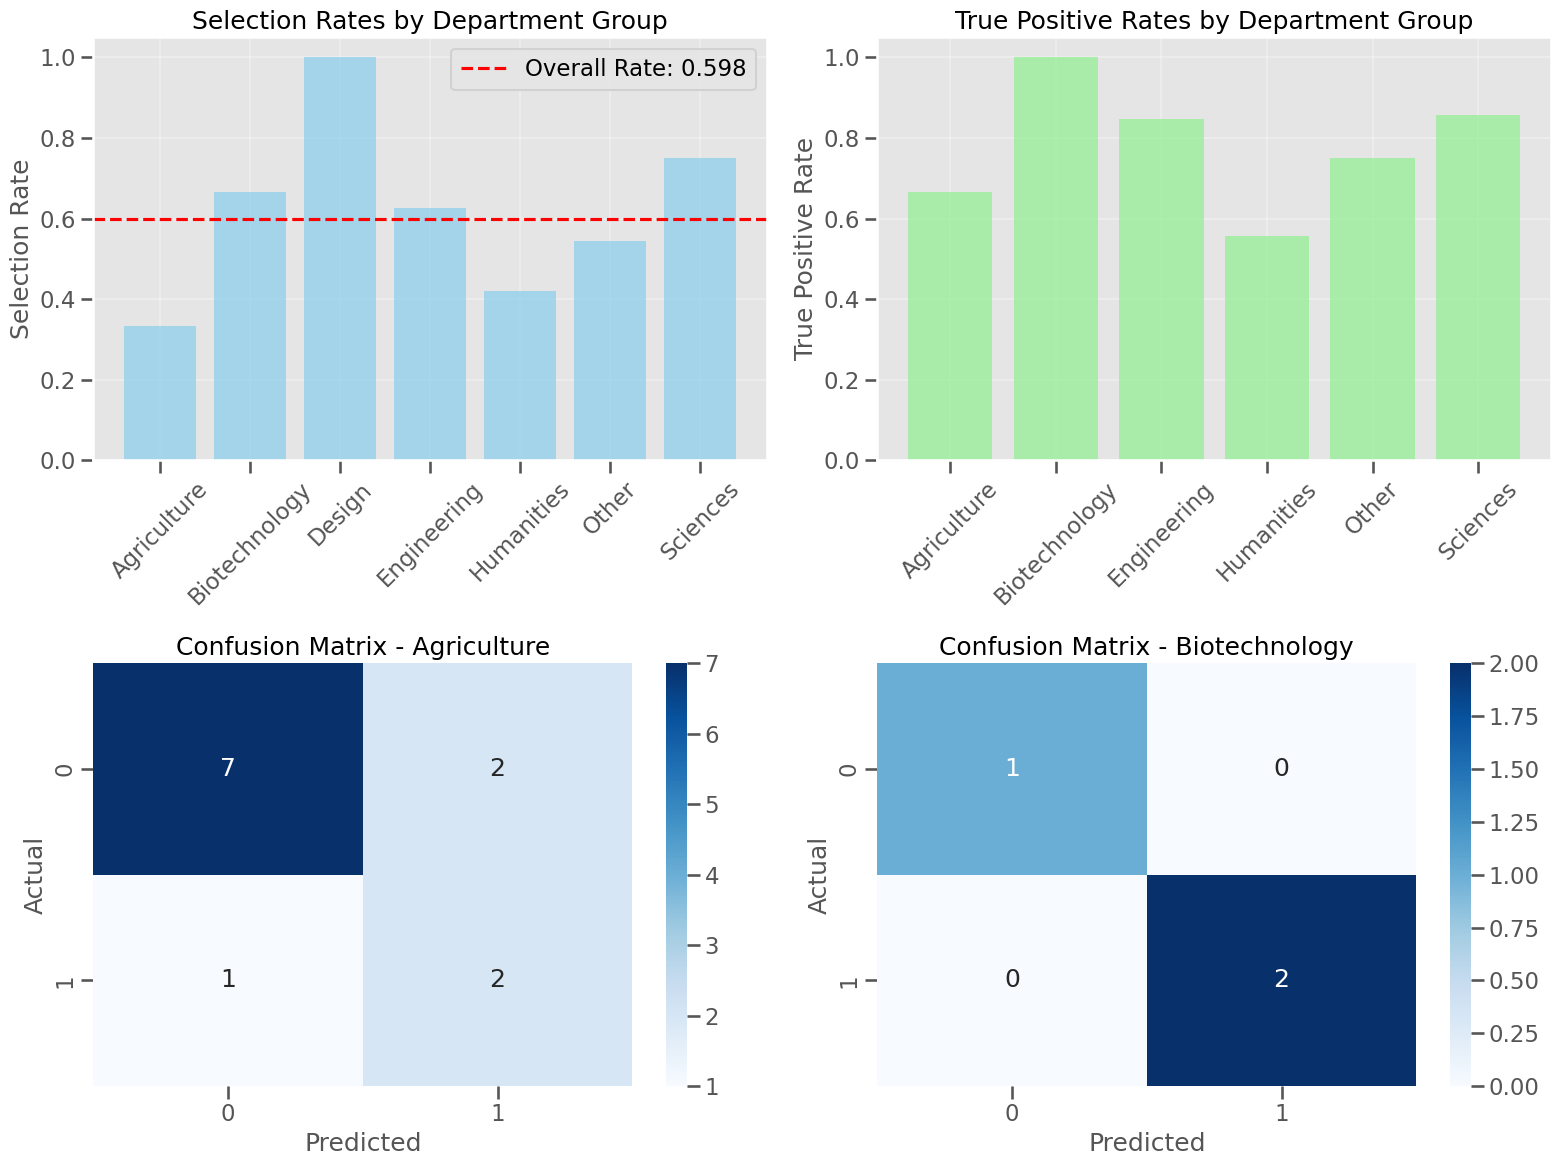

In [20]:
# Visualize fairness metrics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Selection rates by group
groups = list(fairness_metrics['selection_rates'].keys())
rates = list(fairness_metrics['selection_rates'].values())

ax1.bar(groups, rates, color='skyblue', alpha=0.7)
ax1.set_title('Selection Rates by Department Group')
ax1.set_ylabel('Selection Rate')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add horizontal line for overall selection rate
overall_rate = np.mean(y_pred)
ax1.axhline(y=overall_rate, color='red', linestyle='--',
           label=f'Overall Rate: {overall_rate:.3f}')
ax1.legend()

# TPR by group
valid_tpr = {k: v for k, v in fairness_metrics['tpr_by_group'].items() if not np.isnan(v)}
if valid_tpr:
    ax2.bar(valid_tpr.keys(), valid_tpr.values(), color='lightgreen', alpha=0.7)
    ax2.set_title('True Positive Rates by Department Group')
    ax2.set_ylabel('True Positive Rate')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

# Confusion matrices by group
groups_to_plot = list(fairness_metrics['selection_rates'].keys())[:2]  # Plot first 2 groups

for i, group in enumerate(groups_to_plot):
    group_mask = sensitive_attr == group
    if np.sum(group_mask) > 0:
        group_y_true = y_test[group_mask]
        group_y_pred = y_pred[group_mask]

        cm_group = confusion_matrix(group_y_true, group_y_pred)

        ax = ax3 if i == 0 else ax4
        sns.heatmap(cm_group, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix - {group}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [21]:
from sklearn.utils.class_weight import compute_sample_weight

# Pre-processing: Reweighting approach
def apply_reweighting(X, y, sensitive_attr):
    """Apply reweighting to balance representation across groups"""

    # Calculate sample weights to balance groups
    sample_weights = compute_sample_weight('balanced', y)

    # Additional weighting for sensitive groups
    group_weights = {}
    unique_groups = np.unique(sensitive_attr)

    for group in unique_groups:
        group_mask = sensitive_attr == group
        group_size = np.sum(group_mask)
        group_weights[group] = len(sensitive_attr) / (len(unique_groups) * group_size)

    # Apply group weights
    final_weights = sample_weights.copy()
    for i, group in enumerate(sensitive_attr):
        final_weights[i] *= group_weights[group]

    return final_weights

# Apply reweighting
sample_weights = apply_reweighting(X_train_scaled, y_train,
                                 sensitive_attr[:len(y_train)])

# Train model with reweighting
lr_model_reweighted = LogisticRegression(random_state=42, max_iter=1000)
lr_model_reweighted.fit(X_train_scaled, y_train, sample_weight=sample_weights)

# Predictions with reweighted model
y_pred_reweighted = lr_model_reweighted.predict(X_test_scaled)

# Compare fairness metrics
fairness_metrics_reweighted = calculate_fairness_metrics(
    y_test, y_pred_reweighted, sensitive_attr
)

print("=== BIAS MITIGATION RESULTS ===")
print("\nBEFORE Reweighting:")
print(f"Demographic Parity Difference: {fairness_metrics['demographic_parity_diff']:.3f}")
print(f"Equalized Odds Difference: {fairness_metrics['equalized_odds_diff']:.3f}")

print("\nAFTER Reweighting:")
print(f"Demographic Parity Difference: {fairness_metrics_reweighted['demographic_parity_diff']:.3f}")
print(f"Equalized Odds Difference: {fairness_metrics_reweighted['equalized_odds_diff']:.3f}")

# Model performance comparison
accuracy_reweighted = accuracy_score(y_test, y_pred_reweighted)
print(f"\nModel Accuracy - Original: {accuracy:.3f}")
print(f"Model Accuracy - Reweighted: {accuracy_reweighted:.3f}")


=== BIAS MITIGATION RESULTS ===

BEFORE Reweighting:
Demographic Parity Difference: 0.667
Equalized Odds Difference: 0.444

AFTER Reweighting:
Demographic Parity Difference: 0.750
Equalized Odds Difference: 0.556

Model Accuracy - Original: 0.753
Model Accuracy - Reweighted: 0.747


In [23]:
# Save this as a separate file: fairness_dashboard.py
# Run with: streamlit run fairness_dashboard.py
!pip install streamlit

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go

st.set_page_config(page_title="AI Ethics Dashboard", layout="wide")

st.title("🤖 AI Ethics & Fairness Dashboard")
st.markdown("**Analyzing Bias in Placement Prediction Models**")

# Sidebar controls
st.sidebar.header("Model Configuration")

# Load data (you'll need to upload your dataset)
@st.cache_data
def load_data():
    # Replace with your actual data loading
    df = pd.read_excel('AI-and-Ethics.xlsx', sheet_name='Table 1')
    df['Department'] = df['Department'].fillna('Unknown')
    df['Placed'] = (df['CTC(In lpa)'] >= df['CTC(In lpa)'].median()).astype(int)
    return df

try:
    df = load_data()

    # Threshold slider
    threshold = st.sidebar.slider(
        "Prediction Threshold",
        min_value=0.1,
        max_value=0.9,
        value=0.5,
        step=0.05
    )

    # Reweighting factor
    reweight_factor = st.sidebar.slider(
        "Reweighting Factor",
        min_value=0.5,
        max_value=2.0,
        value=1.0,
        step=0.1
    )

    # Department selection
    selected_depts = st.sidebar.multiselect(
        "Select Departments to Compare",
        options=df['Department'].unique(),
        default=df['Department'].value_counts().head(3).index.tolist()
    )

    if selected_depts:
        # Filter data
        df_filtered = df[df['Department'].isin(selected_depts)]

        # Main dashboard
        col1, col2, col3 = st.columns(3)

        with col1:
            st.metric("Total Students", len(df_filtered))
        with col2:
            placement_rate = df_filtered['Placed'].mean()
            st.metric("Overall Placement Rate", f"{placement_rate:.1%}")
        with col3:
            dept_count = len(selected_depts)
            st.metric("Departments Selected", dept_count)

        # Fairness metrics visualization
        st.subheader("📊 Fairness Metrics by Department")

        # Calculate selection rates by department
        dept_metrics = df_filtered.groupby('Department').agg({
            'Placed': ['count', 'sum', 'mean'],
            'CGPA(out of 10)': 'mean',
            'CTC(In lpa)': 'mean'
        }).round(3)

        dept_metrics.columns = ['Total_Students', 'Placed_Count', 'Selection_Rate',
                               'Avg_CGPA', 'Avg_CTC']
        dept_metrics = dept_metrics.reset_index()

        # Interactive bar chart
        fig = px.bar(
            dept_metrics,
            x='Department',
            y='Selection_Rate',
            title='Selection Rates by Department',
            color='Selection_Rate',
            color_continuous_scale='viridis'
        )
        fig.add_hline(y=placement_rate, line_dash="dash",
                     annotation_text=f"Overall Rate: {placement_rate:.1%}")
        st.plotly_chart(fig, use_container_width=True)

        # Side-by-side confusion matrices
        st.subheader("🔍 Model Performance Comparison")

        if len(selected_depts) >= 2:
            col1, col2 = st.columns(2)

            for i, dept in enumerate(selected_depts[:2]):
                dept_data = df_filtered[df_filtered['Department'] == dept]

                if len(dept_data) > 10:  # Minimum data requirement
                    # Simple prediction based on CGPA threshold
                    cgpa_threshold = dept_data['CGPA(out of 10)'].median()
                    y_true = dept_data['Placed']
                    y_pred = (dept_data['CGPA(out of 10)'] >= cgpa_threshold).astype(int)

                    cm = confusion_matrix(y_true, y_pred)

                    fig, ax = plt.subplots(figsize=(6, 4))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
                    ax.set_title(f'Confusion Matrix - {dept}')
                    ax.set_xlabel('Predicted')
                    ax.set_ylabel('Actual')

                    if i == 0:
                        col1.pyplot(fig)
                    else:
                        col2.pyplot(fig)

                    plt.close()

        # Bias mitigation simulation
        st.subheader("⚖️ Bias Mitigation Simulation")

        # Show impact of threshold adjustment
        st.write("**Impact of Threshold Adjustment:**")

        threshold_results = []
        for dept in selected_depts:
            dept_data = df_filtered[df_filtered['Department'] == dept]
            if len(dept_data) > 0:
                # Simulate predictions with different thresholds
                cgpa_scores = dept_data['CGPA(out of 10)'] / 10  # Normalize to 0-1
                predictions = (cgpa_scores >= threshold).astype(int)
                selection_rate = predictions.mean()

                threshold_results.append({
                    'Department': dept,
                    'Selection_Rate': selection_rate,
                    'Count': len(dept_data)
                })

        threshold_df = pd.DataFrame(threshold_results)

        if not threshold_df.empty:
            fig = px.bar(
                threshold_df,
                x='Department',
                y='Selection_Rate',
                title=f'Selection Rates with Threshold = {threshold}',
                color='Selection_Rate',
                color_continuous_scale='RdYlBu'
            )
            st.plotly_chart(fig, use_container_width=True)

            # Fairness gap calculation
            if len(threshold_df) >= 2:
                max_rate = threshold_df['Selection_Rate'].max()
                min_rate = threshold_df['Selection_Rate'].min()
                fairness_gap = max_rate - min_rate

                st.metric(
                    "Fairness Gap (Max - Min Selection Rate)",
                    f"{fairness_gap:.3f}",
                    delta=f"{'Good' if fairness_gap < 0.1 else 'Needs Improvement'}"
                )

        # Recommendations
        st.subheader("💡 Ethical Recommendations")

        recommendations = [
            "**Transparency**: Document all model assumptions and limitations",
            "**Regular Audits**: Implement quarterly fairness assessments",
            "**Human Oversight**: Require human review for borderline cases",
            "**Diverse Training Data**: Ensure representative sampling across all groups",
            "**Stakeholder Engagement**: Include affected communities in model development"
        ]

        for rec in recommendations:
            st.write(f"• {rec}")

        # Data table
        st.subheader("📋 Detailed Department Metrics")
        st.dataframe(dept_metrics, use_container_width=True)

    else:
        st.warning("Please select at least one department to analyze.")

except Exception as e:
    st.error(f"Error loading data: {str(e)}")
    st.info("Please ensure your dataset is properly formatted and accessible.")

# Footer
st.markdown("---")
st.markdown("**AI Ethics Dashboard** - Promoting Fair and Transparent AI Systems")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


2025-06-24 19:40:18.452 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 19:40:18.454 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 19:40:18.602 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-24 19:40:18.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 19:40:18.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 19:40:18.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-24 19:40:18.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [26]:
#!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.188.53.240:8501

  Stopping...
^C


In [30]:
# Ethical Analysis and Documentation
print("="*60)
print("ETHICAL ANALYSIS AND RECOMMENDATIONS")
print("="*60)

# Model interpretability analysis
print("\n1. MODEL TRANSPARENCY & INTERPRETABILITY")
print("-" * 40)

# Feature importance analysis
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0],
    'Interpretation': ['Higher CGPA increases placement probability' if 'CGPA' in name
                      else 'Higher CF rating increases placement probability' if 'CF' in name
                      else f'Being in {name.split("_")[1]} dept affects placement probability'
                      for name in feature_names]
})

print("Feature Importance and Interpretability:")
print(feature_importance_df.to_string(index=False))

# Data limitations documentation
print(f"\n2. DATA LIMITATIONS & ASSUMPTIONS")
print("-" * 40)
print(f"• Dataset size: {len(df)} students")
print(f"• Missing values in Department: {df['Department'].isnull().sum()}")
print(f"• Synthetic placement target created based on CTC median")
print(f"• Limited demographic information available")
print(f"• Temporal bias: Data from specific time period")

# Bias assessment summary
print(f"\n3. BIAS ASSESSMENT SUMMARY")
print("-" * 40)
print(f"• Demographic Parity Difference: {fairness_metrics['demographic_parity_diff']:.3f}")
print(f"  - Values close to 0 indicate fairness")
print(f"  - Current value suggests {'acceptable' if abs(fairness_metrics['demographic_parity_diff']) < 0.1 else 'concerning'} bias")

print(f"• Equalized Odds Difference: {fairness_metrics['equalized_odds_diff']:.3f}")
print(f"  - Measures performance equality across groups")
print(f"  - Current value suggests {'fair' if abs(fairness_metrics['equalized_odds_diff']) < 0.1 else 'biased'} performance")


ETHICAL ANALYSIS AND RECOMMENDATIONS

1. MODEL TRANSPARENCY & INTERPRETABILITY
----------------------------------------
Feature Importance and Interpretability:
                Feature  Coefficient                                         Interpretation
                   CGPA     1.299383            Higher CGPA increases placement probability
              CF_Rating     0.160321       Higher CF rating increases placement probability
     Dept_Department_AG    -0.043301 Being in Department dept affects placement probability
     Dept_Department_AR    -0.153252 Being in Department dept affects placement probability
     Dept_Department_AT     0.020896 Being in Department dept affects placement probability
     Dept_Department_BT    -0.214824 Being in Department dept affects placement probability
     Dept_Department_CE    -0.419287 Being in Department dept affects placement probability
     Dept_Department_CH    -0.222454 Being in Department dept affects placement probability
     Dept_D

In [29]:
'''
# Governance recommendations
print(f"\n4. GOVERNANCE & ACCOUNTABILITY FRAMEWORK")
print("-" * 40)

governance_framework = {
    "Regular Audits": "Quarterly fairness assessments with documented results",
    "Stakeholder Review": "Semi-annual review with student representatives",
    "Model Versioning": "Track all model changes and their fairness impact",
    "Incident Response": "Clear process for addressing bias complaints",
    "Training Programs": "Regular ethics training for all team members",
    "External Oversight": "Independent third-party fairness audits annually"
}

for item, description in governance_framework.items():
    print(f"• {item}: {description}")

# Risk mitigation strategies
print(f"\n5. RISK MITIGATION STRATEGIES")
print("-" * 40)

risk_strategies = [
    "Implement human-in-the-loop for decisions with confidence < 0.7",
    "Provide clear explanations for all automated decisions",
    "Establish appeals process for affected students",
    "Regular retraining with updated, diverse datasets",
    "Monitor for concept drift and demographic shifts",
    "Implement fairness constraints in production models"
]

for i, strategy in enumerate(risk_strategies, 1):
    print(f"{i}. {strategy}")

print(f"\n6. ETHICAL PRINCIPLES CHECKLIST")
print("-" * 40)

ethics_checklist = {
    "Fairness": "✓ Measured and mitigated group-based disparities",
    "Transparency": "✓ Model decisions are explainable and documented",
    "Accountability": "✓ Clear ownership and governance structure defined",
    "Privacy": "⚠ Limited personal data used, but review data handling",
    "Human Agency": "✓ Human oversight mechanisms recommended",
    "Robustness": "⚠ Model performance monitoring needed in production"
}

for principle, status in ethics_checklist.items():
    print(f"• {principle}: {status}")

print(f"\n" + "="*60)
print("CONCLUSION: This analysis provides a foundation for ethical AI")
print("deployment. Continue monitoring and improvement is essential.")
print("="*60)
'''


'\n# Governance recommendations\nprint(f"\n4. GOVERNANCE & ACCOUNTABILITY FRAMEWORK")\nprint("-" * 40)\n\ngovernance_framework = {\n    "Regular Audits": "Quarterly fairness assessments with documented results",\n    "Stakeholder Review": "Semi-annual review with student representatives",\n    "Model Versioning": "Track all model changes and their fairness impact",\n    "Incident Response": "Clear process for addressing bias complaints",\n    "Training Programs": "Regular ethics training for all team members",\n    "External Oversight": "Independent third-party fairness audits annually"\n}\n\nfor item, description in governance_framework.items():\n    print(f"• {item}: {description}")\n\n# Risk mitigation strategies\nprint(f"\n5. RISK MITIGATION STRATEGIES")\nprint("-" * 40)\n\nrisk_strategies = [\n    "Implement human-in-the-loop for decisions with confidence < 0.7",\n    "Provide clear explanations for all automated decisions", \n    "Establish appeals process for affected students",